<a href="https://colab.research.google.com/github/mangatayaru/Regression-Project_Bike_Sharing_Demand_Prediction/blob/main/Regression_Project_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 - Javvadi L N S S Mangatayaru


# **Project Summary -**

Now-a-days to increase the mobility comfort, the rental bikes (like Rapido, Ola bikes etc) are introduced in the urban cities. It is important to make the rental bike avaliable and accessible to public at the right time to lessen the waiting time. Bikes are more comfortable than cars in narrow lane areas. Eventually providing the city with a stable supply of rental bikes becomes a major concern. The climatic conditions effect the rental bike rides. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. In this project, different regression techniques are applied on the bike sharing data. There are 14 columns in the dataset. Fields Description:
Date - Date,
Hour - Hour of the day (0-23),
Temperature - Temperature of the day,
Humidity - Humidity measure,
Windspeed - Windspeed,
Visibility - Visibility measure,
Dew Point Temperature - Dew Point Temperature Measure,
Solar Radiation - Solar Radiation Measure,
Rainfall - Rainfall in mm,
Snowfall - Snowfall measure,
Seasons - 1= spring, 2 = summer, 3 = fall, 4 = winter,
Holiday - Whether a holiday or not,
Functional Day - Whether a functional day or not.
Firstly the data is cleaned. Secondly, EDA analysis is done to find which factors effect the rental bike count. After that, in order to make the data ready for machine learning, skewness is verified and transformation is applied everywhere needed to make the data normally distributed. Outliers are found and removed if needed. If these treatments are not applied it results in wrong predictions. The data is scaled equally over all the columns using the different scaling techniques like Standard Scalar, MinmaxScalar etc. Now data is splitted into train and test data with certain ratio and random state. The data is modelled using train data and prediction is done on test data. The different evaluation metrics are applied to check the accuracy of the model and results are compared to find the best model for this bike sharing demand dataset.




# **GitHub Link -**

https://github.com/mangatayaru/Regression-Project_Bike_Sharing_Demand_Prediction

# **Problem Statement**


The objective of this project is to predict bike rental count on hourly basis, based on several atmospheric and environmental conditions to maintain stable bike supply.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset

In [ ]:
dataset = pd.read_csv('/content/SeoulBikeData.csv',encoding="unicode_escape")

### Dataset First View

In [ ]:
# Dataset First Look

In [ ]:
dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

In [ ]:
len(dataset)#Rows count

8760

In [ ]:
dataset.shape

(8760, 14)

**The dataset has 8760 rows and 14 columns**

### Dataset Information

In [ ]:
# Dataset Info

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
dataset["Date"]=pd.to_datetime(dataset["Date"])

In [ ]:
dataset["month"]=dataset["Date"].apply(lambda x:x.month)
day=dataset["Date"].apply(lambda x:x.weekday())
day.unique()

array([3, 6, 2, 4, 0, 5, 1])

In [ ]:
def weekday_decision(col):
  if col<5:
    return "Weekday"
  else:
    return "Weekoff"
dataset["Weekday"]=day.apply(weekday_decision)
dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  month  Weekday  
0             Yes      1  Weekday  
1             Yes      1  Weekday  
2             Yes      1  Weekday  
3             Yes      1  Weekday  
4             Yes      1  Weekday

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

In [ ]:
len(dataset[dataset.duplicated()])

0

In [ ]:
dataset[dataset.duplicated()]

Empty DataFrame
Columns: [Date, Rented Bike Count, Hour, Temperature(°C), Humidity(%), Wind speed (m/s), Visibility (10m), Dew point temperature(°C), Solar Radiation (MJ/m2), Rainfall(mm), Snowfall (cm), Seasons, Holiday, Functioning Day, month, Weekday]
Index: []

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

In [ ]:
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
Weekday                      0
dtype: int64

In [ ]:
# Visualizing the missing values

In [ ]:
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
Weekday                      0
dtype: int64

There are no null values in the bike sharing dataset.

### What did you know about your dataset?

The dataset contains information about bike rental count based on several atmospheric and environmental conditions like rainfall, visibility, windspeed etc.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

In [ ]:
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'month', 'Weekday'],
      dtype='object')

In [ ]:
# Dataset Describe

In [ ]:
dataset.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)        month  
count              8760.000000   8760.000000    8760.000000  8760.000000  
mean                  0.569111      0.148687       0.075068     6.526027  
std                   0.868746      1.128193       0.436746     3.448048  
min                   0.000000      0.000000       0.000000     1.000000  
25%                   0.000000      0.000000       0.000000     4.000000  
50%                   0.010000      0.000000       0.000000     7.000000  
75%                   0.930000      0.000000       0.000000    10.000000  
max                   3.520000     35.000000       8.800000    12.000000

### Variables Description

Date - Date

Hour - Hour of the day (0-23)

Temperature - Temperature of the day

Humidity - Humidity measure

Windspeed - Windspeed

Visibility - Visibility measure

Dew Point Temperature - Dew Point Temperature Measure

Solar Radiation - Solar Radiation Measure

Rainfall - Rainfall in mm

Snowfall - Snowfall measure

Seasons - 1= spring, 2 = summer, 3 = fall, 4 = winter

Holiday - Whether a holiday or not

Functional Day - Whether a functional day or not

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

In [ ]:
dataset['Date'].unique()

array(['2017-01-12T00:00:00.000000000', '2017-02-12T00:00:00.000000000',
       '2017-03-12T00:00:00.000000000', '2017-04-12T00:00:00.000000000',
       '2017-05-12T00:00:00.000000000', '2017-06-12T00:00:00.000000000',
       '2017-07-12T00:00:00.000000000', '2017-08-12T00:00:00.000000000',
       '2017-09-12T00:00:00.000000000', '2017-10-12T00:00:00.000000000',
       '2017-11-12T00:00:00.000000000', '2017-12-12T00:00:00.000000000',
       '2017-12-13T00:00:00.000000000', '2017-12-14T00:00:00.000000000',
       '2017-12-15T00:00:00.000000000', '2017-12-16T00:00:00.000000000',
       '2017-12-17T00:00:00.000000000', '2017-12-18T00:00:00.000000000',
       '2017-12-19T00:00:00.000000000', '2017-12-20T00:00:00.000000000',
       '2017-12-21T00:00:00.000000000', '2017-12-22T00:00:00.000000000',
       '2017-12-23T00:00:00.000000000', '2017-12-24T00:00:00.000000000',
       '2017-12-25T00:00:00.000000000', '2017-12-26T00:00:00.000000000',
       '2017-12-27T00:00:00.000000000', '2017-12-28

In [ ]:
dataset['Rented Bike Count'].unique()

array([ 254,  204,  173, ..., 1538,  804,  595])

In [ ]:
dataset['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
dataset['Temperature(°C)'].unique()

array([ -5.2,  -5.5,  -6. ,  -6.2,  -6.4,  -6.6,  -7.4,  -7.6,  -6.5,
        -3.5,  -0.5,   1.7,   2.4,   3. ,   2.1,   1.2,   0.8,   0.6,
         0. ,  -0.3,  -0.8,  -0.9,  -1.3,  -1.8,  -2.2,  -2.9,  -3.8,
        -4. ,  -4.3,  -4.4,  -4.2,  -0.4,   1.9,   4.3,   6. ,   7.3,
         7.6,   6.4,   5.5,   5. ,   4.6,   4.1,   3.5,   4. ,   3.9,
         3.3,   3.4,   3.1,   3.2,   4.4,   5.1,   5.8,   6.8,   8. ,
         6.7,   5.7,   5.2,   4.7,   4.2,   3.6,   2.8,   2. ,   0.2,
        -1.5,  -1.1,   0.1,  -0.1,  -0.2,  -2.1,  -3.6,  -4.6,  -5.3,
        -5.8,  -6.1,  -6.8,  -6.9,  -7.2,  -7.5,  -8.1,  -3.9,  -2.3,
        -1.6,  -0.7,  -2.6,  -3.2,  -3.7,  -2.8,  -2.5,  -3. ,  -3.4,
        -3.3,   1.6,   5.3,   1.1,   1.3,   1.4,   1.5,   1. ,   0.3,
         2.3,   3.7,   0.7,  -1.4,  -2.7,  -4.8,  -7. ,  -6.7,  -2. ,
        -1.7,  -2.4,  -3.1,  -4.1,  -4.7,  -5.1,  -5.4,   2.5,   0.4,
         0.5,   0.9,   5.4,  -1. ,  -5.6,  -5.9,  -7.1,  -7.9,  -8.6,
        -9.3,  -9.7,

In [ ]:
dataset['Humidity(%)'].unique()

array([37, 38, 39, 40, 36, 35, 27, 24, 21, 23, 25, 26, 54, 58, 66, 77, 79,
       81, 83, 84, 87, 86, 82, 68, 57, 49, 41, 48, 51, 53, 52, 55, 56, 69,
       71, 73, 75, 91, 92, 89, 85, 76, 90, 88, 47, 30, 29, 32, 43, 45, 44,
       42, 34, 33, 31, 28, 46, 59, 78, 70, 64, 60, 94, 93, 96, 65, 50, 74,
       63, 61, 72, 62, 22, 67, 80, 95, 15, 20, 17, 18, 16, 19, 14, 97, 98,
       10, 13, 12, 11,  0])

In [ ]:
dataset['Wind speed (m/s)'].unique()

array([2.2, 0.8, 1. , 0.9, 2.3, 1.5, 1.3, 1.1, 0.5, 1.2, 1.4, 1.6, 2. ,
       3.2, 4.2, 1.7, 0.6, 2.1, 2.5, 1.8, 2.6, 1.9, 2.7, 3.7, 3.4, 3.5,
       4.5, 4.1, 4.8, 5.4, 5.8, 4.7, 5.3, 3.9, 3. , 2.4, 2.8, 0. , 3.1,
       2.9, 0.7, 0.4, 3.3, 0.3, 4.3, 4. , 3.8, 3.6, 5.1, 4.6, 0.1, 5. ,
       4.4, 4.9, 0.2, 6.7, 6. , 5.2, 5.6, 7.4, 7.2, 6.1, 7.3, 6.9, 5.7])

In [ ]:
dataset['Dew point temperature(°C)'].unique()

array([-17.6, -17.7, -18.6, -18.7, -19.5, -19.3, -19.8, -22.4, -21.2,
       -20.2, -17.2, -15.6, -14.6, -11.4,  -7. ,  -6.5,  -5. ,  -3.5,
        -3.6,  -3.4,  -4.2,  -4.9,  -6.2,  -6.9,  -7.1,  -7.3,  -7.9,
        -7.8,  -7.7,  -4.8,  -3.8,  -3.3,  -4. ,  -4.6,  -4.1,  -1.2,
         0. ,  -1.3,  -0.8,  -0.1,   1.2,   1.7,   2. ,   2.1,   2.7,
         3.1,   3.4,   3.7,   3.6,   3.8,   3.3,   3.2,   2.6,   2.4,
         2.3,   1.3,   1.1,  -0.5,  -2.5,  -5.7, -11.3, -13. , -12.1,
       -12.9, -15.5, -16.7, -17.8, -18.8, -18.3, -17.3, -15.8, -15.3,
       -16.1, -16.9, -18.5, -20.4, -20.9, -20.6, -21. , -20.5, -21.8,
       -22. , -19.7, -18.2, -16. , -15.1, -14.4, -13.5, -13.4, -13.3,
       -12. ,  -9.4,  -6.1,  -6.4,  -7.2,  -7.6,  -7.4,  -6.8,  -6. ,
        -9.1, -10.3,  -8.2,  -2.9,   0.2,   0.3,   0.1,   0.5,   0.4,
        -0.7,  -1.1,  -1.4,  -2.8,  -2.2,  -9.3, -10.1,  -9.7,  -9.6,
       -11.2, -12.2, -12.6, -12.4, -13.1, -13.6, -15.4, -17.9, -19.1,
       -17.1, -16.6,

In [ ]:
dataset['Solar Radiation (MJ/m2)'].unique()

array([0.  , 0.01, 0.23, 0.65, 0.94, 1.11, 1.16, 1.01, 0.54, 0.24, 0.08,
       0.3 , 0.8 , 1.  , 1.09, 1.12, 0.99, 0.74, 0.22, 0.06, 0.02, 0.25,
       0.43, 0.6 , 0.69, 0.53, 0.2 , 0.05, 0.64, 1.17, 0.88, 0.55, 0.18,
       0.21, 0.63, 0.93, 1.08, 1.1 , 0.96, 0.72, 0.36, 0.1 , 0.14, 0.41,
       0.98, 1.14, 1.04, 0.84, 0.51, 0.15, 1.22, 0.87, 0.56, 0.61, 0.89,
       1.05, 1.13, 1.06, 0.4 , 0.03, 0.28, 0.35, 0.62, 1.26, 1.24, 0.92,
       0.58, 0.19, 1.23, 0.13, 0.52, 0.48, 0.09, 0.34, 0.42, 0.32, 0.86,
       1.07, 0.17, 0.85, 0.47, 0.57, 0.91, 0.71, 0.12, 0.67, 0.77, 0.78,
       0.16, 0.66, 0.38, 0.11, 0.04, 0.07, 1.18, 0.9 , 0.33, 0.75, 0.59,
       0.29, 0.81, 0.83, 0.39, 1.15, 1.03, 0.95, 0.76, 1.02, 0.26, 0.5 ,
       0.27, 0.73, 0.46, 0.31, 1.2 , 1.19, 0.45, 0.49, 0.79, 0.44, 0.68,
       1.27, 1.25, 1.21, 0.7 , 1.28, 1.3 , 1.29, 0.82, 1.65, 2.04, 2.25,
       2.18, 1.91, 1.42, 1.57, 1.99, 2.22, 2.17, 1.89, 1.4 , 1.73, 2.12,
       2.29, 2.23, 1.94, 1.44, 1.72, 2.09, 2.3 , 2.

In [ ]:
dataset['Rainfall(mm)'].unique()

array([ 0. ,  0.5,  1. ,  2.5,  0.1,  0.2,  0.3,  0.7,  1.6,  0.4,  1.1,
        6.4,  9.5,  3.5,  0.9,  3.3,  1.4,  1.5,  3.7,  4.5,  9. ,  2. ,
        8. , 17. ,  7. ,  3. ,  1.9,  0.8,  4. ,  6. ,  5. ,  5.5,  2.4,
       35. , 19. , 13.5, 10. , 12.5, 11.5,  5.4, 10.5,  6.5, 16. , 14.5,
        4.9, 21.5, 12. , 18.5,  7.5, 24. ,  8.5,  7.3,  1.3, 15.5, 29.5,
       21. , 13. ,  1.2, 18. ,  9.1,  1.8])

In [ ]:
dataset['Snowfall (cm)'].unique()

array([0. , 0.1, 0.3, 0.4, 0.2, 1. , 0.9, 0.8, 0.7, 0.6, 2.7, 4. , 4.1,
       4.3, 3.9, 3.1, 2.1, 1.4, 0.5, 1.3, 1.8, 2. , 4.8, 5.1, 5. , 4.2,
       3.2, 2.6, 2.5, 2.3, 2.2, 1.9, 1.7, 1.6, 2.4, 1.2, 1.1, 3. , 3.3,
       3.5, 3.4, 2.8, 1.5, 3.8, 3.7, 7.1, 8.8, 7. , 6. , 3.6, 2.9])

In [ ]:
dataset['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [ ]:
dataset['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [ ]:
dataset['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
dataset["month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
dataset["Weekday"].unique()

array(['Weekday', 'Weekoff'], dtype=object)

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

1. In which hour of the day more rented bikes are booked?

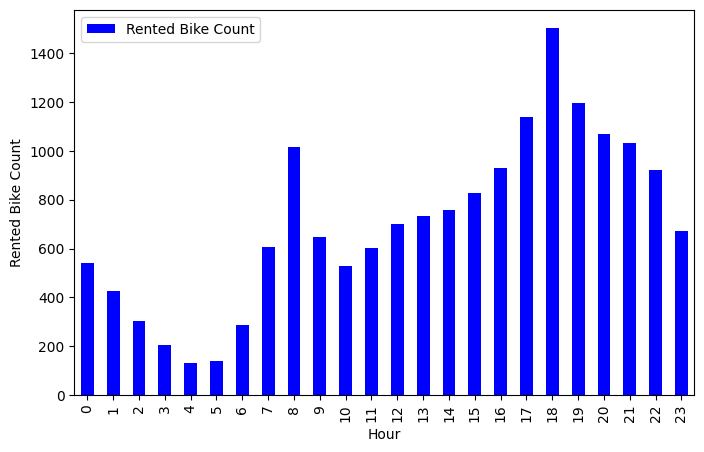

In [ ]:
a1=dataset.groupby(["Hour"])["Rented Bike Count"].mean()
plt.figure(figsize=(8,5))
a1.plot(kind="bar",color='b')
plt.legend()
plt.ylabel("Rented Bike Count")
plt.show()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

More number of bikes are rented in the evening particularly around 6pm(from 5pm to 7pm mostly) since the schools,colleges,institutions etc, are closed around 5pm. It is a positive impact that at peak hours, the demand for bikes will be more.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

2. In which season there will be more rental bike bookings?

<Figure size 1000x500 with 0 Axes>

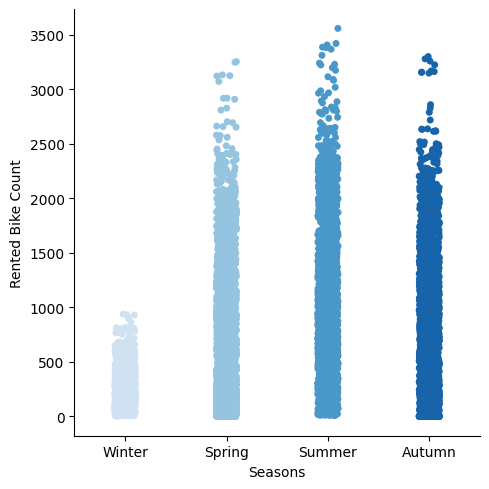

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x="Seasons",y="Rented Bike Count",data=dataset,palette="Blues")
plt.ylabel("Rented Bike Count")
plt.show()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In Summer season, more rented bikes are booked and least bookings are done in winter season. The demand for bikes are more when the temperature is high.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

3.  On which days of the week more number of bikes are rented?

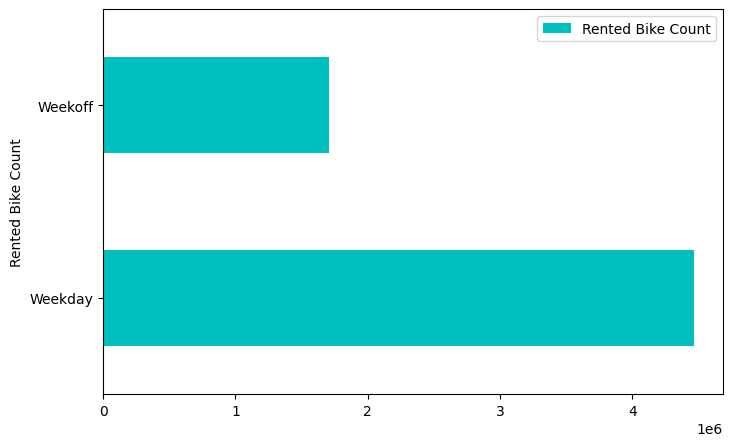

In [ ]:
a3=dataset.groupby(["Weekday"])["Rented Bike Count"].sum()
plt.figure(figsize=(8,5))
a3.plot(kind="barh",color='c')
plt.legend()
plt.ylabel("Rented Bike Count")
plt.show()

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

More number of bikes are rented on weekdays compared to Saturday and Sunday because people generally go out for work on weekdays.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

4. On holiday or working day more bikes are rented?

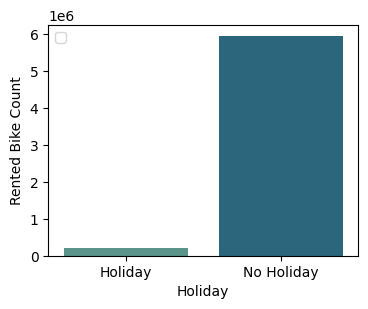

In [ ]:
a4=dataset.groupby(["Holiday"])["Rented Bike Count"].sum().reset_index()
plt.figure(figsize=(4,3))
sns.barplot(x="Holiday",y="Rented Bike Count",data=a4,palette="crest")
plt.legend()
plt.ylabel("Rented Bike Count")
plt.show()

More bikes are rented on working days(No Holiday) because people go outside for work, education, business etc. In holiday people generally want to relax at home.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

5. In which month there will be more number of rented bike bookings?

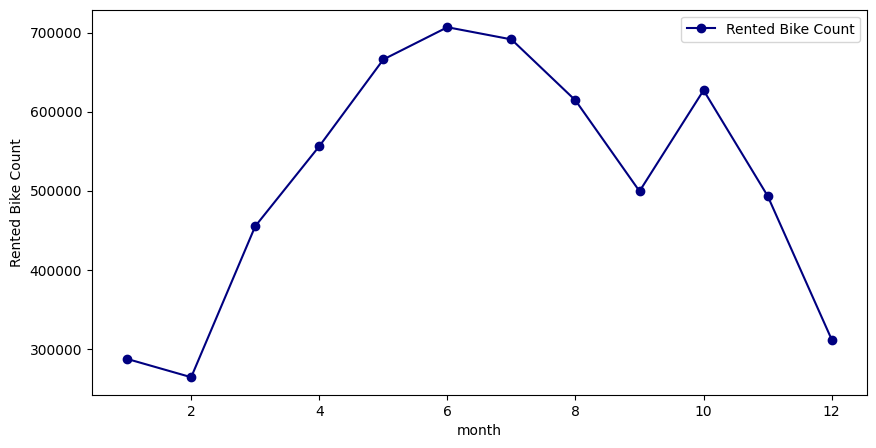

In [ ]:
a5=dataset.groupby(["month"])["Rented Bike Count"].sum()
plt.figure(figsize=(10,5))
a5.plot(color='navy',marker='o')
plt.legend()
plt.ylabel("Rented Bike Count")
plt.show()


In July month, there is more demand. January,Feburary,December has least demand compared to other months since that is winter season.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

6. Plotting the distribution of every numerical feature using histogram and also including the mean and median lines in graph

In [ ]:
num_features=['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)','month']

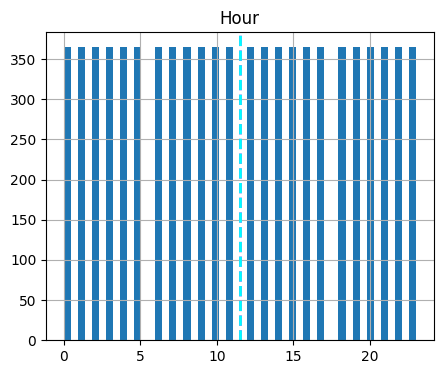

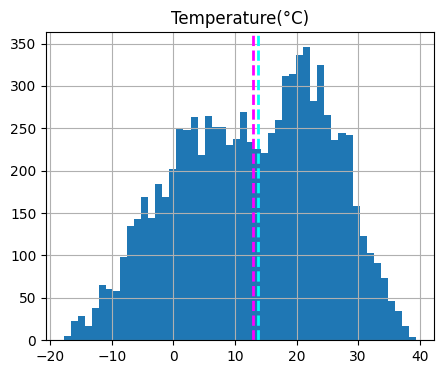

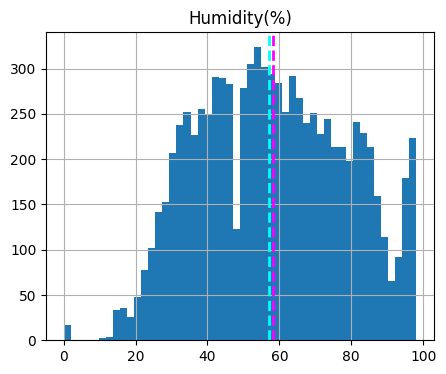

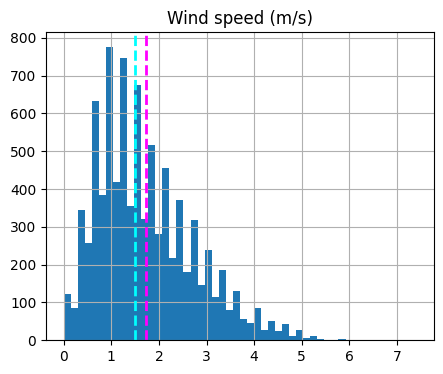

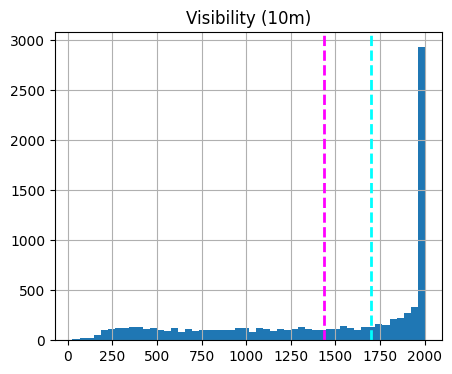

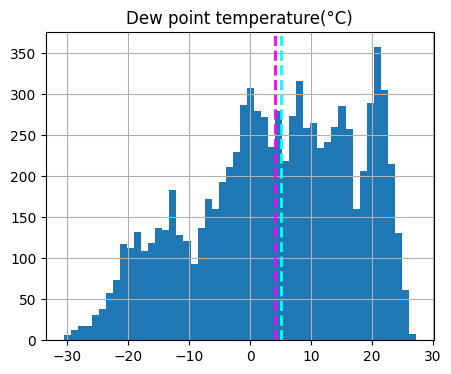

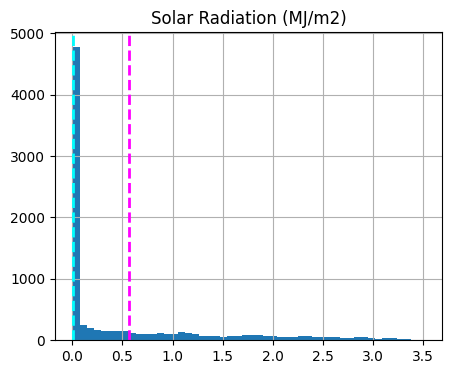

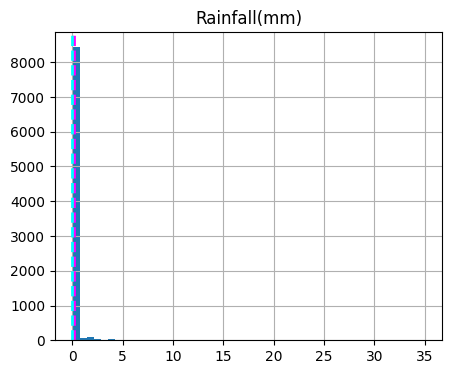

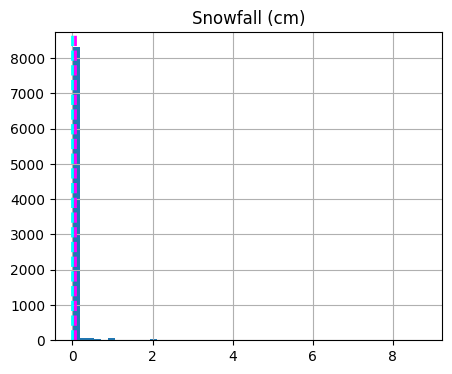

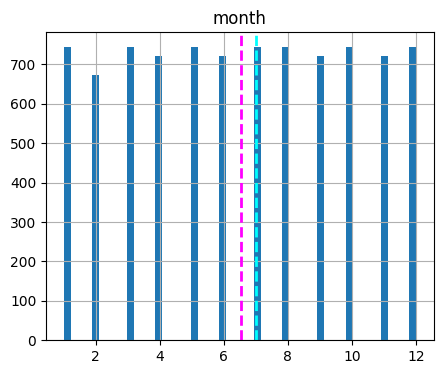

In [ ]:
for col in num_features[0:]:
    fig = plt.figure(figsize=(5, 4))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

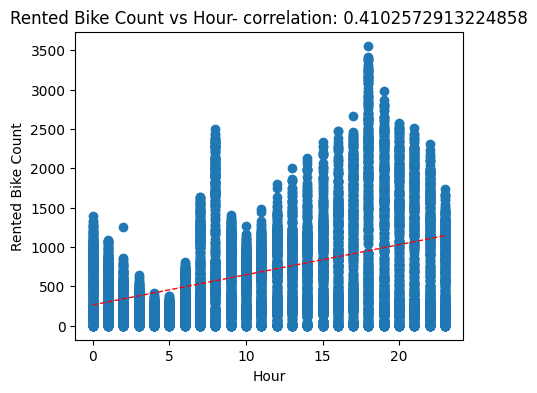

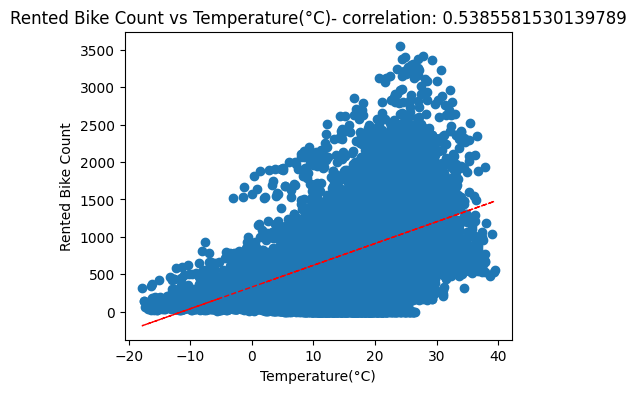

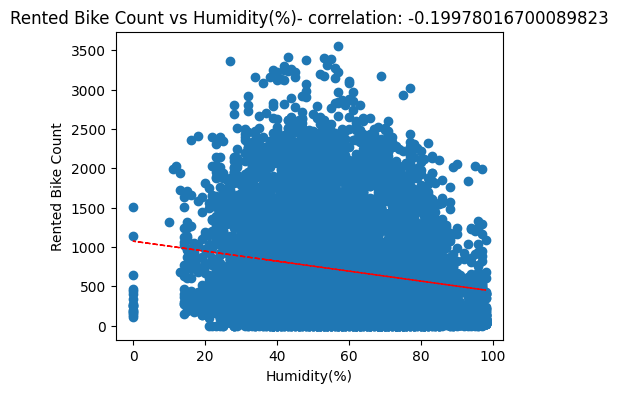

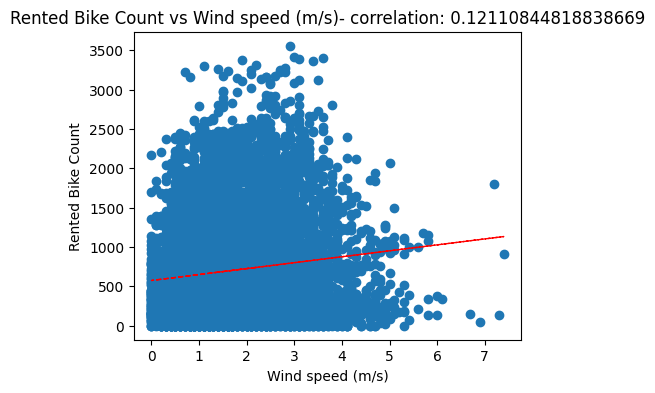

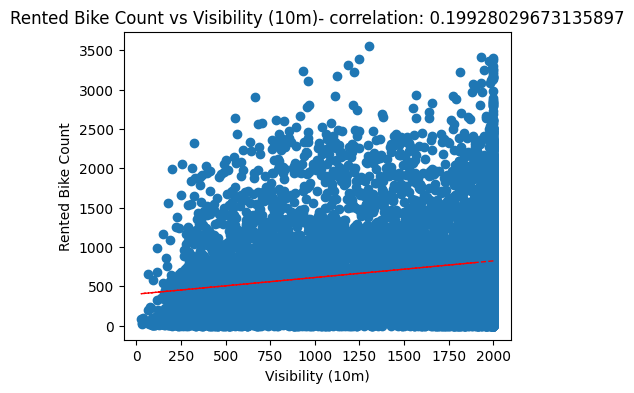

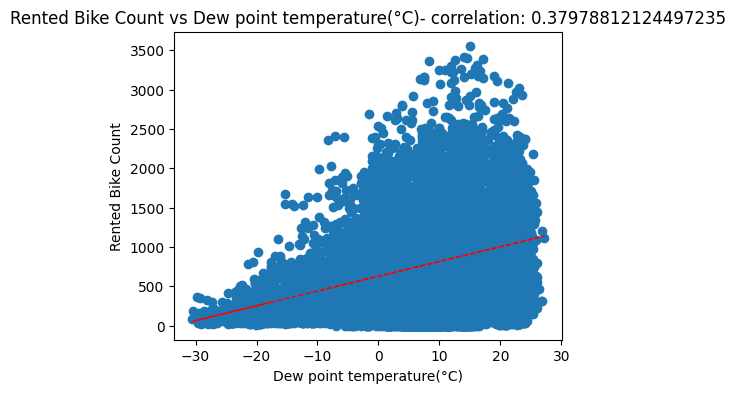

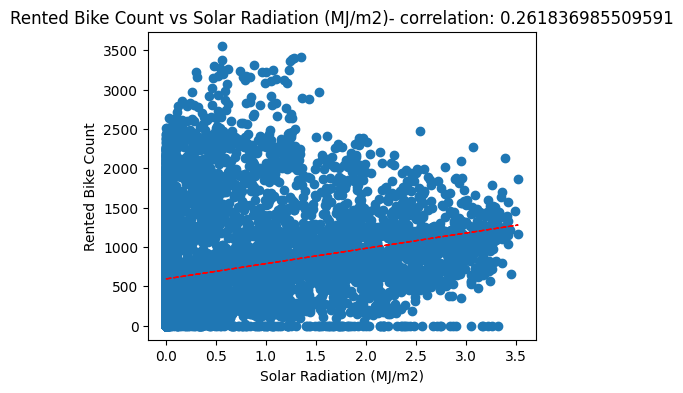

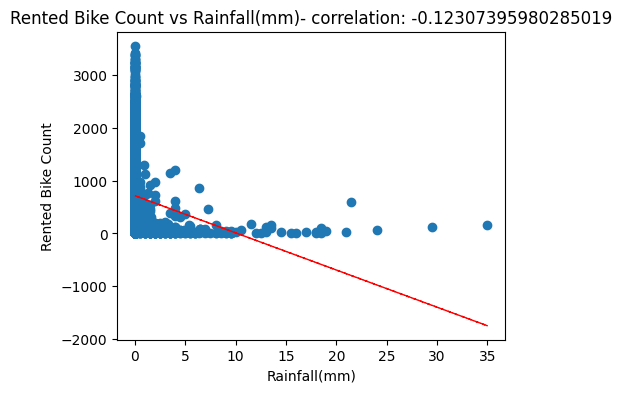

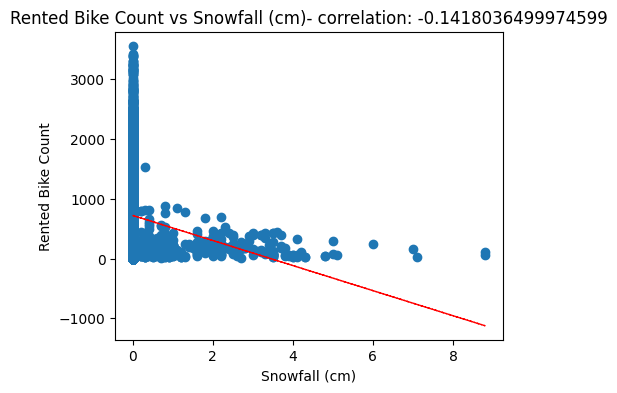

In [ ]:
for col in num_features[0:-1]:
    fig = plt.figure(figsize=(5, 4))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(dataset[col])
    plt.plot(dataset[col], y_hat, "r--", lw=1)
plt.show()

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

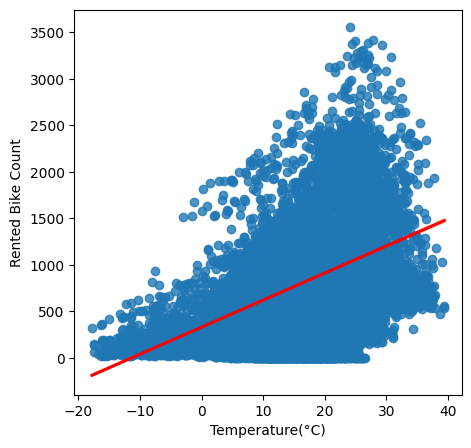

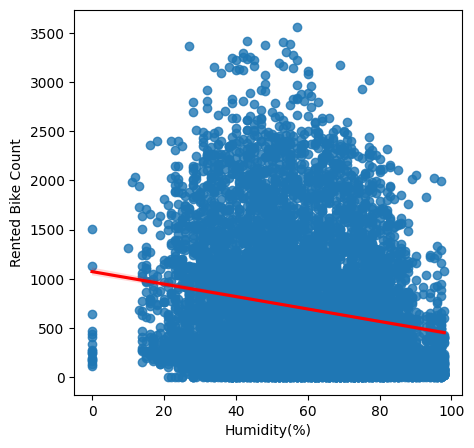

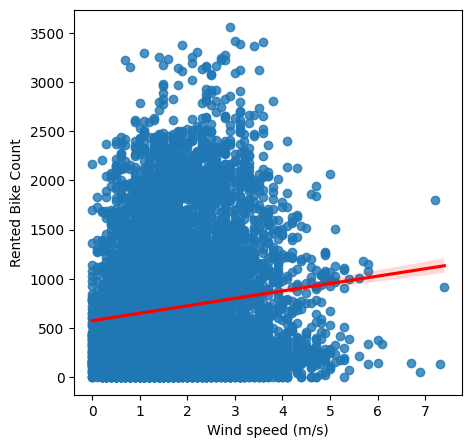

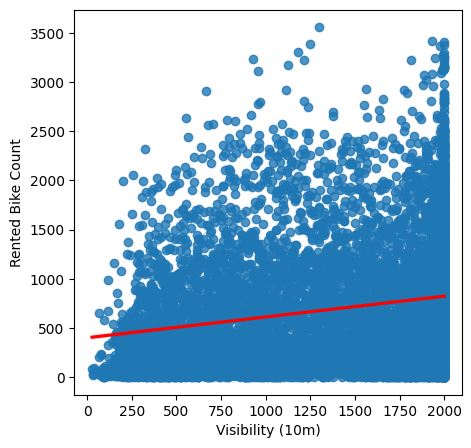

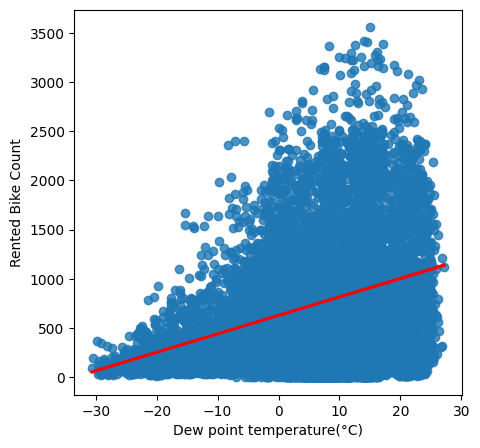

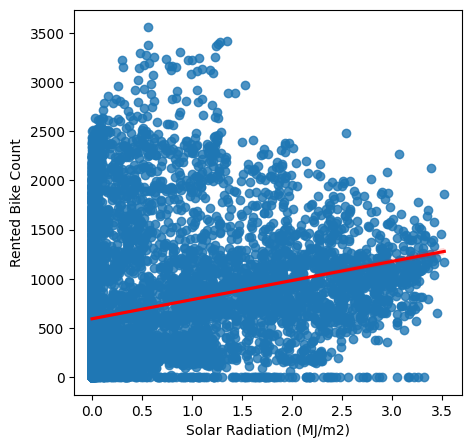

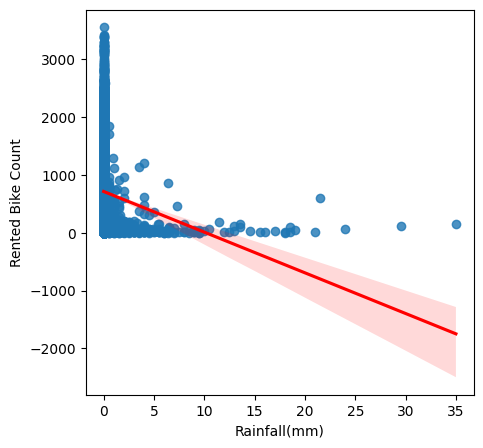

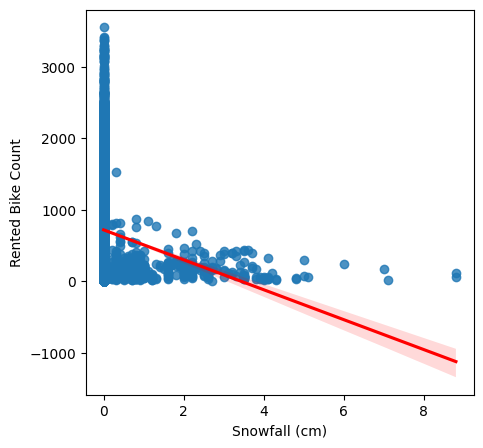

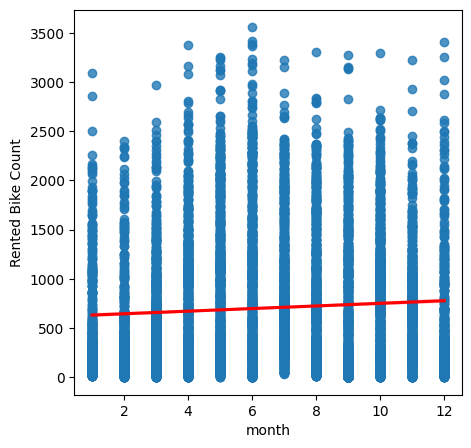

In [ ]:
for col in num_features[1:]:
    fig = plt.figure(figsize=(5, 5))
    feature = dataset[col]
    sns.regplot(x = feature,y = "Rented Bike Count",data = dataset,line_kws={"color":"red"})
    ax.set_title(col)
plt.show()

#### Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

<Axes: >

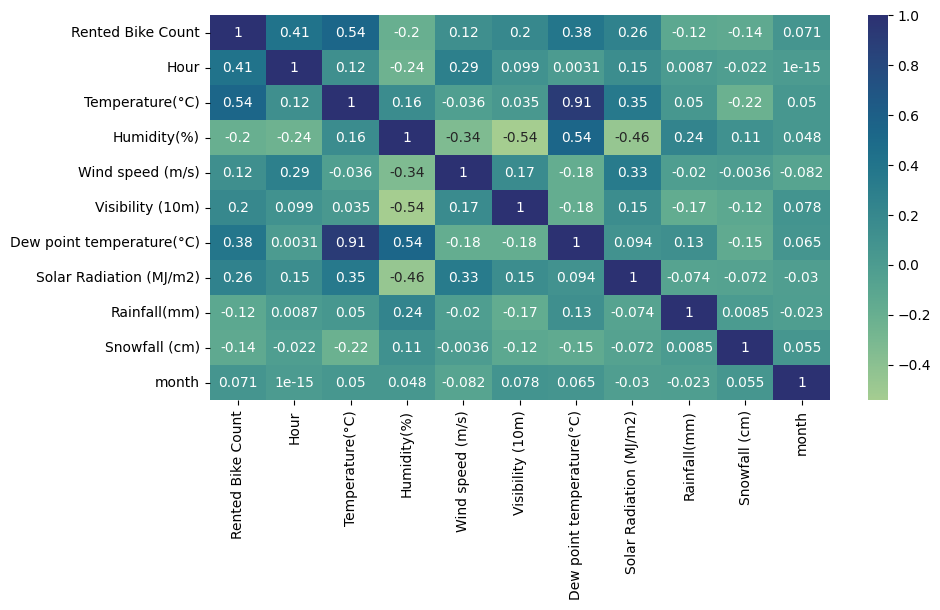

In [ ]:
f=dataset.corr()
plt.figure(figsize=(10,5))
sns.heatmap(f,annot=True,cmap="crest")

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

<Axes: >

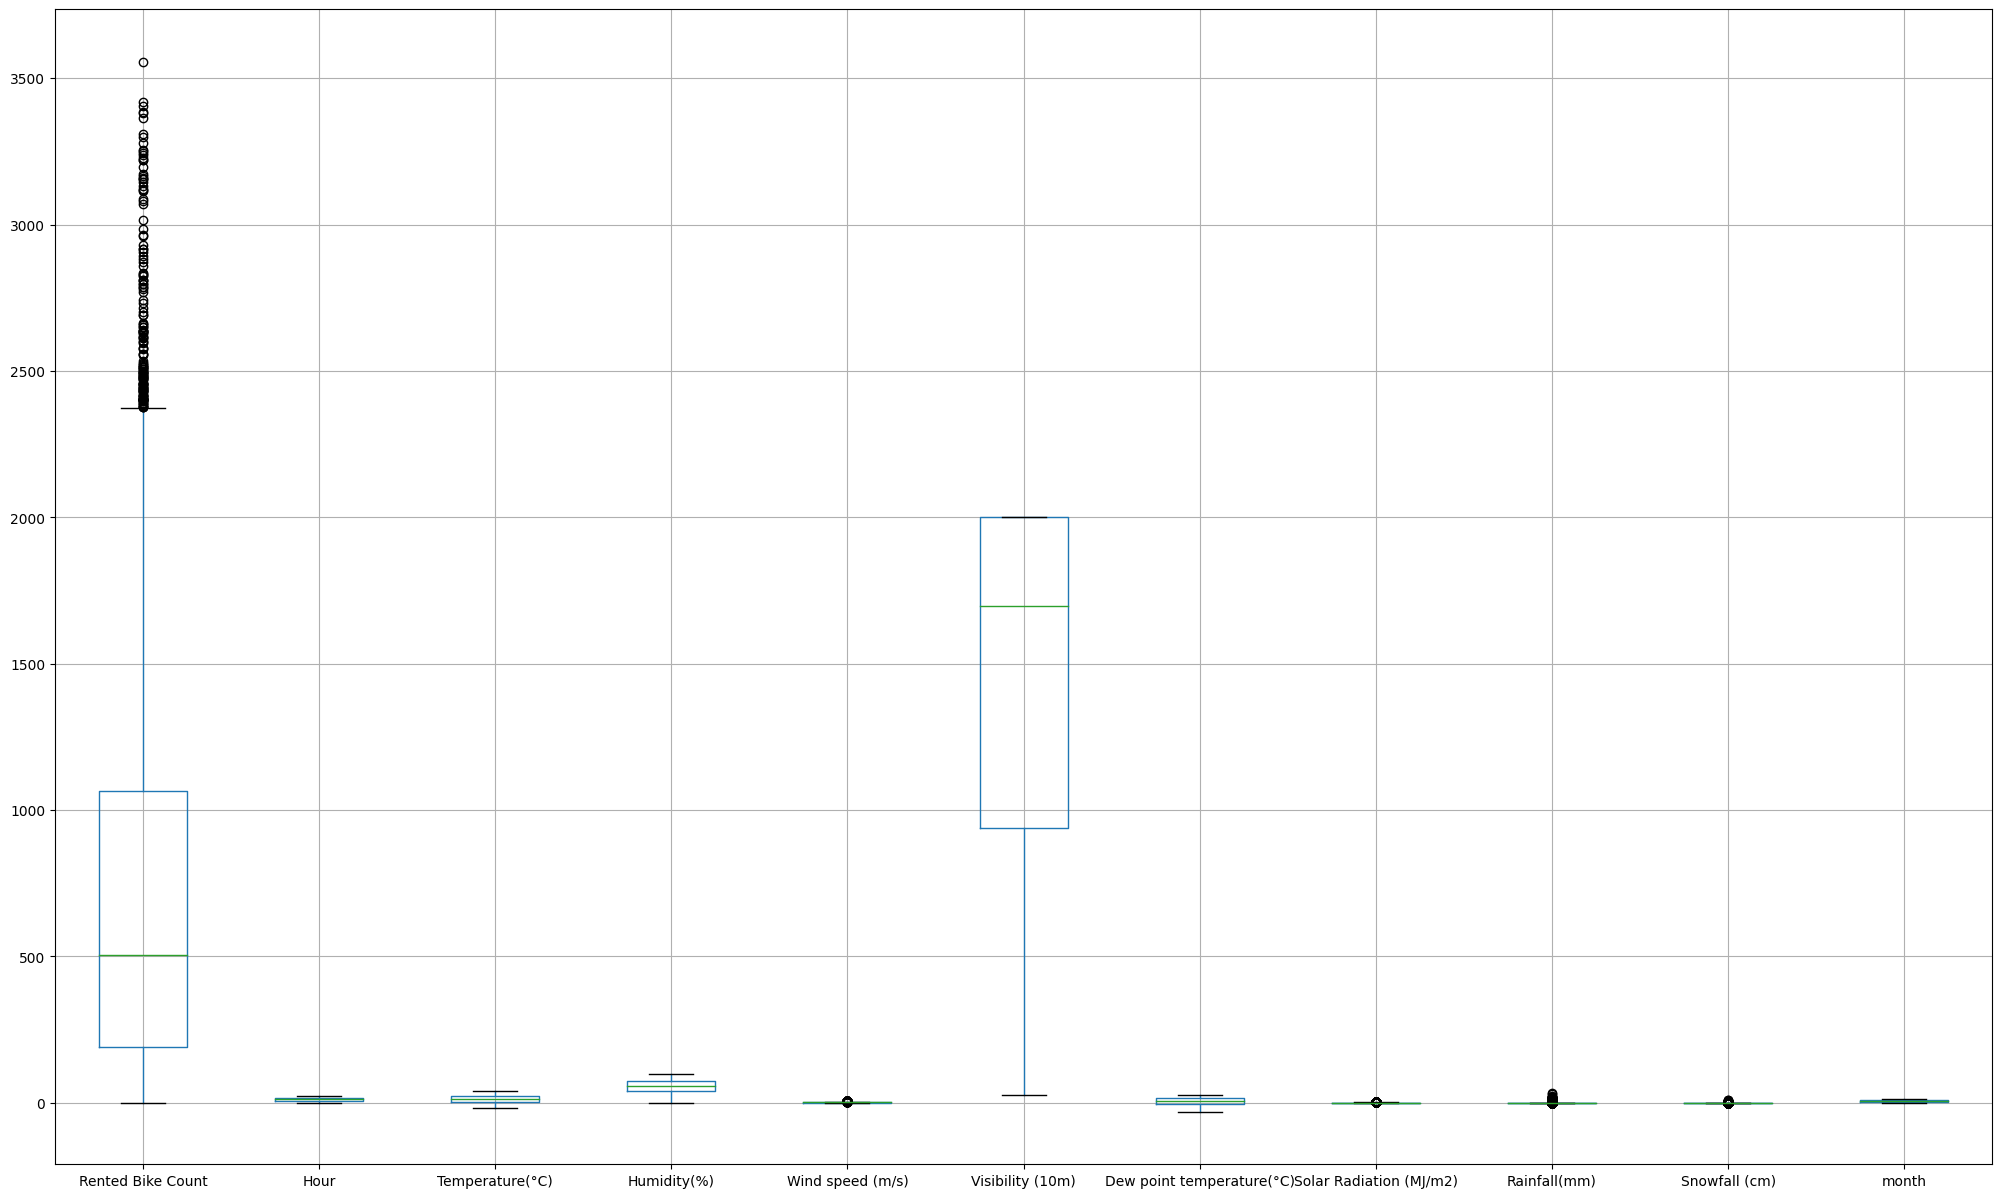

In [ ]:
plt.figure(figsize=(25,15))
dataset.boxplot()

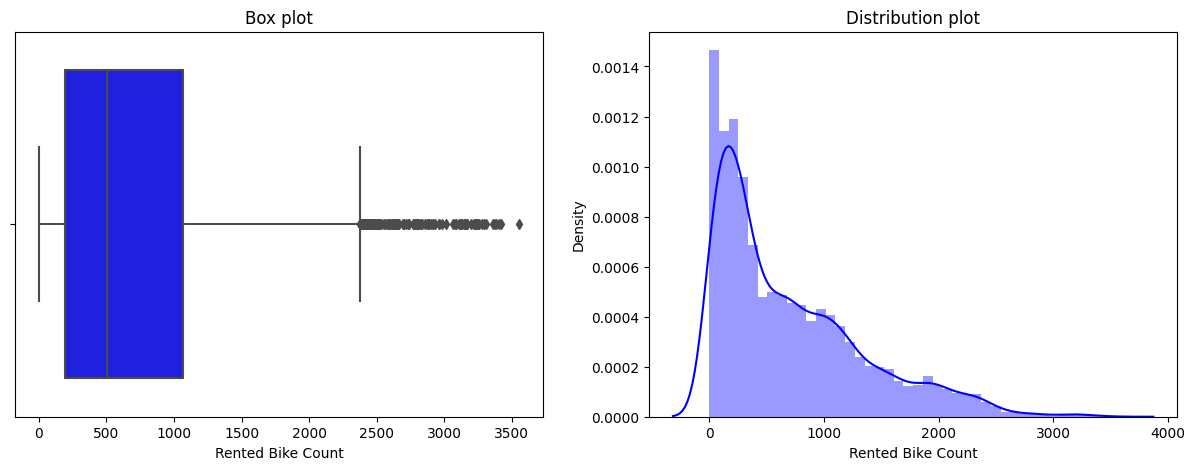

In [ ]:
fig, axes=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x="Rented Bike Count",data=dataset,color="b",ax=axes[0])
axes[0].set_title("Box plot")
sns.distplot(dataset['Rented Bike Count'],color="b",ax=axes[1])
axes[1].set_title("Distribution plot")
plt.show()

The distribution of the Rented bike count is rightly skewed so squareroot transformation is need to be applied on count column.

In [ ]:
dataset["Rented Bike Count"]=np.sqrt(dataset["Rented Bike Count"])

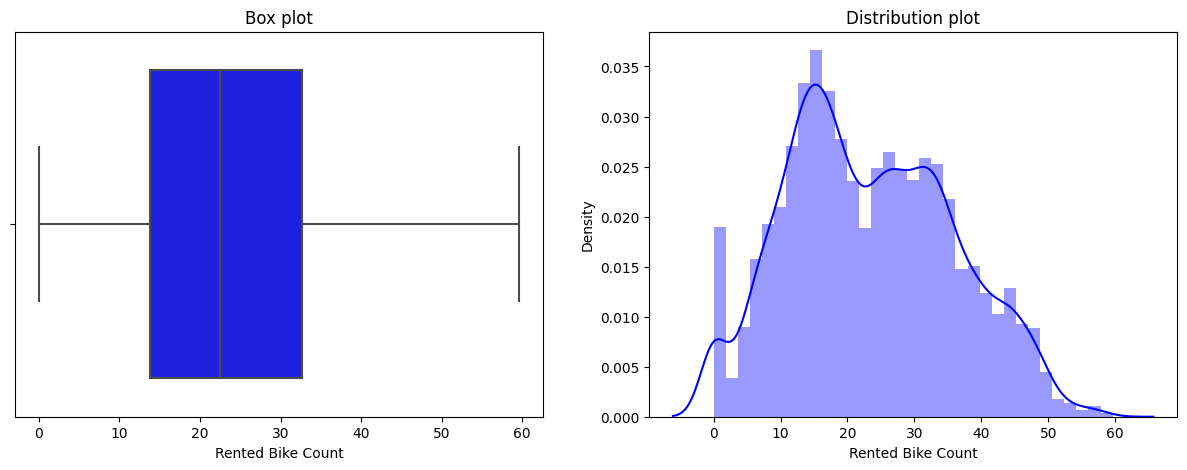

In [ ]:
fig, axes=plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x="Rented Bike Count",data=dataset,color="blue",ax=axes[0])
axes[0].set_title("Box plot")
sns.distplot(dataset['Rented Bike Count'],color="b",ax=axes[1])
axes[1].set_title("Distribution plot")
plt.show()

The outliers are removed and distribution is normally distributed after applying the transformation.

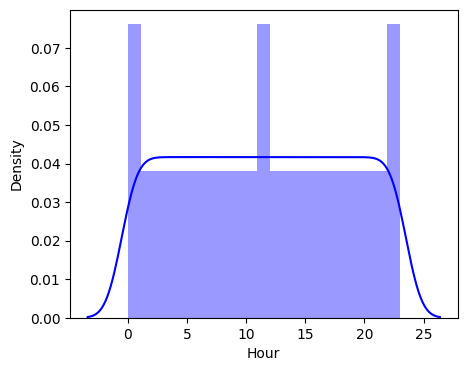

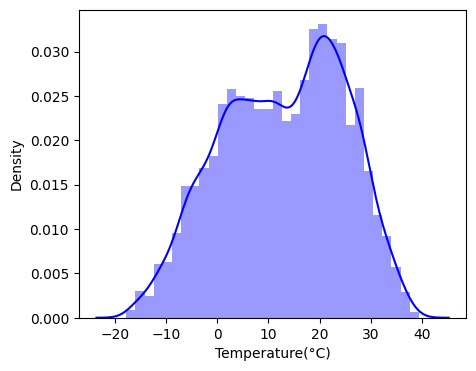

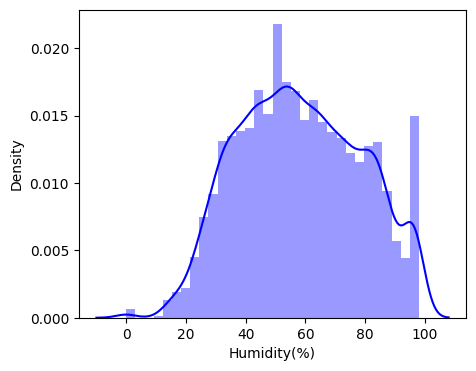

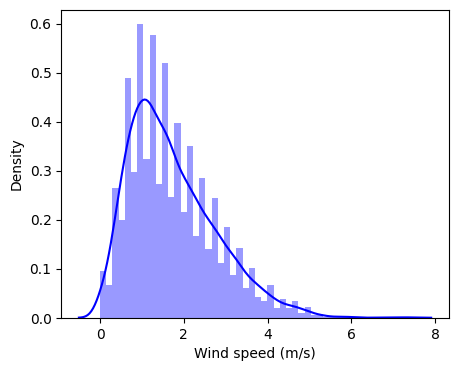

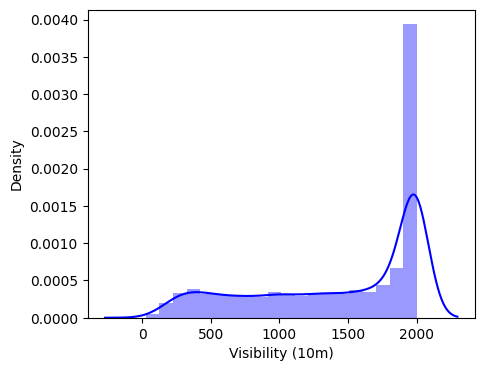

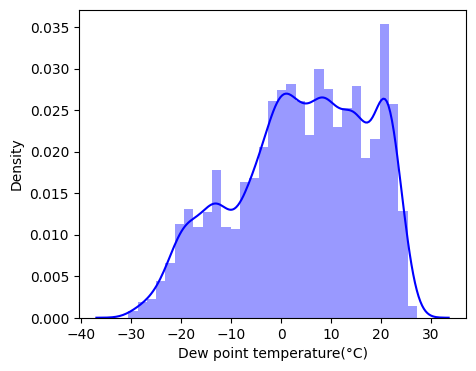

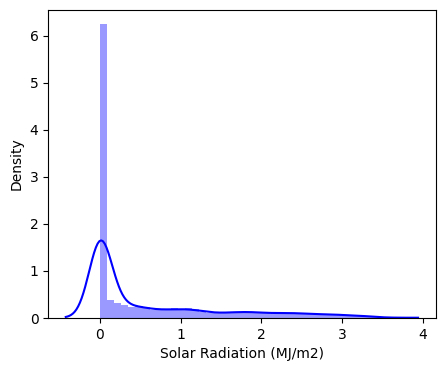

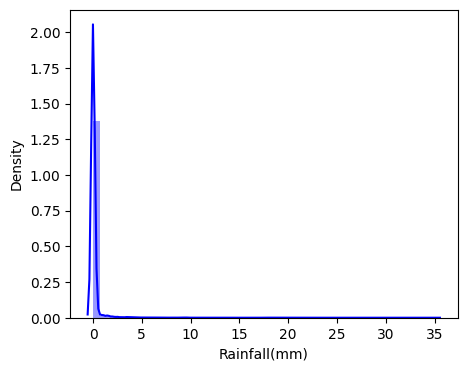

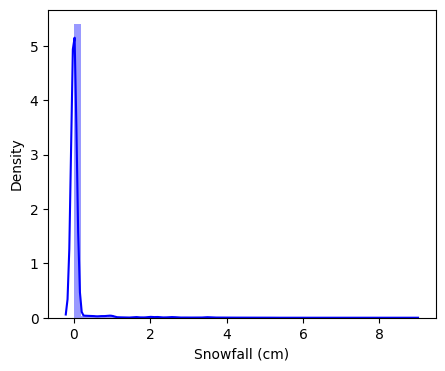

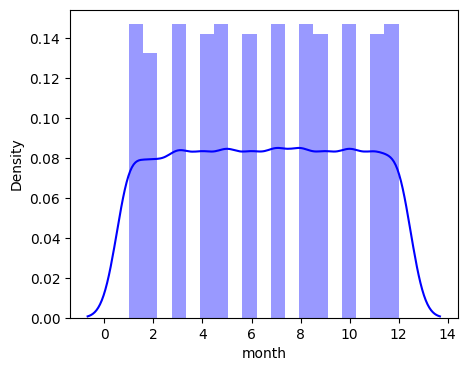

In [ ]:
for col in num_features:
    plt.figure(figsize=(5,4))
    sns.distplot(dataset[col],color="blue")
plt.show()

In [ ]:
dataset.agg(['skew']).transpose()

skew
Rented Bike Count           0.237362
Hour                        0.000000
Temperature(°C)            -0.198326
Humidity(%)                 0.059579
Wind speed (m/s)            0.890955
Visibility (10m)           -0.701786
Dew point temperature(°C)  -0.367298
Solar Radiation (MJ/m2)     1.504040
Rainfall(mm)               14.533232
Snowfall (cm)               8.440801
month                      -0.010458

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count'] ]])

variables        VIF
0                       Hour   4.424145
1            Temperature(°C)  34.053862
2                Humidity(%)   6.791640
3           Wind speed (m/s)   4.829379
4           Visibility (10m)   9.307161
5  Dew point temperature(°C)  17.547805
6    Solar Radiation (MJ/m2)   2.881761
7               Rainfall(mm)   1.082923
8              Snowfall (cm)   1.125240
9                      month   4.689821

It shows that we can drop either Temperature or Dewpoint temperature. Drop Dew point temperature(°C) column since temperature column(0.54) is more correlated to rental bike count than Dew point temperature(°C)(0.38).

In [ ]:
dataset.drop(columns=["Dew point temperature(°C)"],axis=1,inplace=True)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count'] ]])

variables       VIF
0                     Hour  3.956097
1          Temperature(°C)  3.230202
2              Humidity(%)  6.006861
3         Wind speed (m/s)  4.615739
4         Visibility (10m)  5.332471
5  Solar Radiation (MJ/m2)  2.265399
6             Rainfall(mm)  1.081093
7            Snowfall (cm)  1.124563
8                    month  4.577143

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

In [ ]:
dataset["Functioning Day"][dataset["Functioning Day"]=="Yes"]=1
dataset["Functioning Day"][dataset["Functioning Day"]=="No"]=0

In [ ]:
dataset["Functioning Day"].value_counts()

1    8465
0     295
Name: Functioning Day, dtype: int64

In [ ]:
# Create dummy variables for the catgeorical variable State
dataset['spring_Season'] = np.where(dataset['Seasons']=='Spring', 1, 0)
dataset['Summer_season'] = np.where(dataset['Seasons']=='Summer', 1, 0)
dataset['Winter_Season'] = np.where(dataset['Seasons']=='Winter', 1, 0)
dataset['Autumn_season'] = np.where(dataset['Seasons']=='Autumn', 1, 0)
# Drop the original column State from the dataframe
dataset.drop(columns=['Seasons'],axis=1,inplace=True)

In [ ]:
dataset["Holiday"][dataset["Holiday"]=="Holiday"]=1
dataset["Holiday"][dataset["Holiday"]=="No Holiday"]=0

In [ ]:
dataset["Weekday"][dataset["Weekday"]=="Weekday"]=1
dataset["Weekday"][dataset["Weekday"]=="Weekoff"]=0

In [ ]:
dataset.head(2)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   

   Wind speed (m/s)  Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
0               2.2              2000                      0.0           0.0   
1               0.8              2000                      0.0           0.0   

   Snowfall (cm) Holiday Functioning Day  month Weekday  spring_Season  \
0            0.0       0               1      1       1              0   
1            0.0       0               1      1       1              0   

   Summer_season  Winter_Season  Autumn_season  
0              0              1              0  
1              0              1              0

In [ ]:
dependent_variable="Rented Bike Count"

In [ ]:
independent_variables=list(set(dataset.columns.tolist()) - {dependent_variable,'Date'})

In [ ]:
independent_variables

['Snowfall (cm)',
 'Hour',
 'Rainfall(mm)',
 'month',
 'Wind speed (m/s)',
 'Solar Radiation (MJ/m2)',
 'Holiday',
 'Summer_season',
 'Autumn_season',
 'Temperature(°C)',
 'Humidity(%)',
 'Functioning Day',
 'Visibility (10m)',
 'Weekday',
 'Winter_Season',
 'spring_Season']

## ***ML Model Implementation***

 **Creating a function for fitting, predicting and to calculate evaluation metrics**

In [ ]:
def cal_eval_metrics(est,x,y,x_t,y_t):
  est.fit(x,y)
  y_pred=est.predict(x_t)
  print("\n------------------- Evaluation metrics --------------------\n")
  from sklearn.metrics import mean_squared_error,mean_absolute_error
  from sklearn.metrics import r2_score
  import math
  import matplotlib.pyplot as plt
  import warnings
  warnings.filterwarnings('ignore')

  result = pd.DataFrame(data=[mean_squared_error(np.square(y_t), np.square(y_pred)),
                              mean_absolute_error(np.square(y_t), np.square(y_pred)) ,
                              np.sqrt(mean_squared_error(np.square(y_t), np.square(y_pred))),
                              r2_score(np.square(y_t), np.square(y_pred)),
                              1-(1-r2_score(np.square(y_t), np.square(y_pred)))*((x_t.shape[0]-1)/(x_t.shape[0]-x_t.shape[1]-1))],
                          index=["MSE","MAE","RMSE","R2","Adjusted R2"])

  print("MSE:",mean_squared_error(np.square(y_t), np.square(y_pred)))
  print("r2_score:",r2_score(np.square(y_t), np.square(y_pred)))
  print("Adjusted R2:",1-(1-r2_score(np.square(y_t), np.square(y_pred)))*((x_t.shape[0]-1)/(x_t.shape[0]-x_t.shape[1]-1)))
  print("\n")

  print("\n-----------------Graph of actual and predicted values----------------\n")

  plt.figure(figsize=(15,10))
  plt.plot((y_pred)[0:150])
  plt.plot((np.array(y_test)[0:150]))
  plt.legend(["Predicted","Actual"])
  plt.show()

  return result


In [ ]:
y=dataset["Rented Bike Count"]
X=dataset.drop(["Date","Rented Bike Count"],axis=1)

**TRAIN,TEST AND SPLIT**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
X_train_shap=X_train
X_test_shap=X_test

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# **LINEAR REGRESSION**


------------------- Evaluation metrics --------------------

MSE: 180651.3383181629
r2_score: 0.5664155296067264
Adjusted R2: 0.5624170561045405



-----------------Graph of actual and predicted values----------------



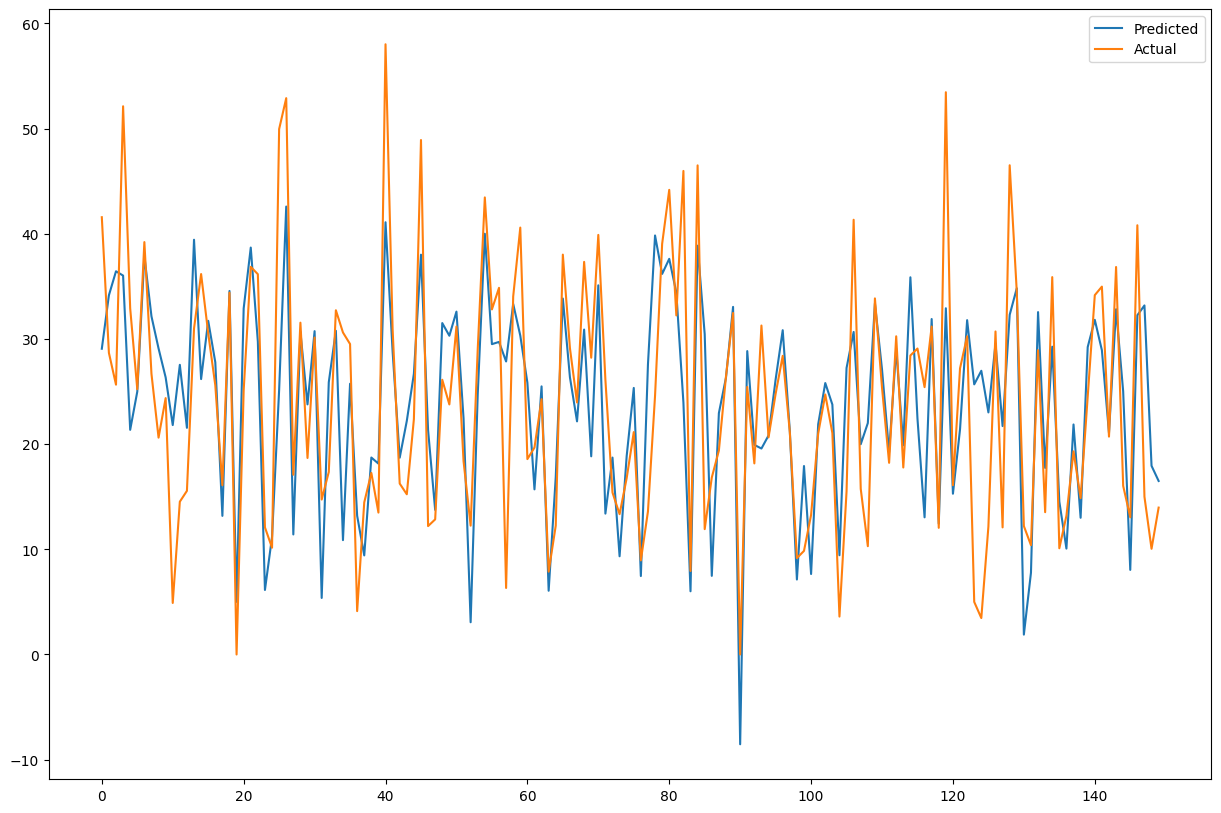

In [ ]:
# ML Model - 1 Implementation
# Fit the Algorithm
reg=LinearRegression()
LR_result=cal_eval_metrics(reg,X_train,y_train,X_test,y_test)
# Predict on the model

# **LASSO REGULARIZATION**


------------------- Evaluation metrics --------------------

MSE: 181107.6524603786
r2_score: 0.565320321967926
Adjusted R2: 0.5613117485682066



-----------------Graph of actual and predicted values----------------



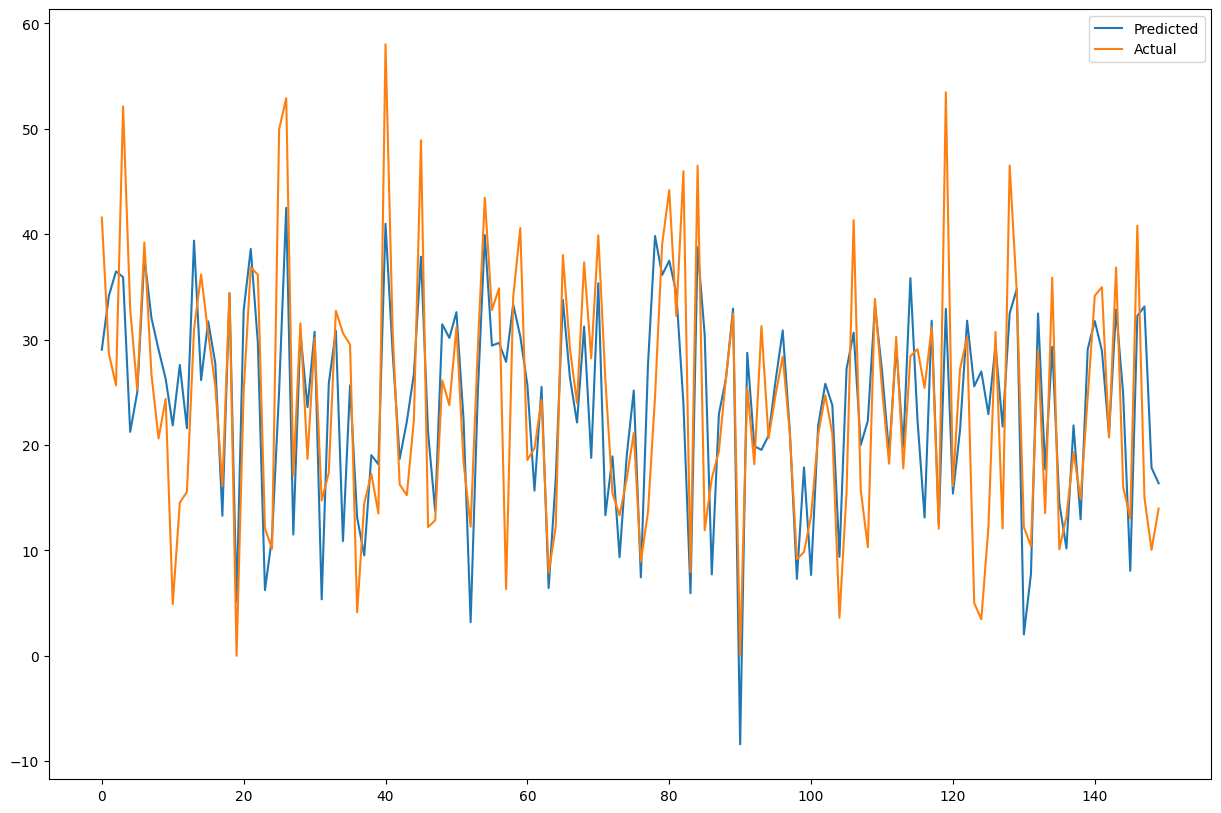

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014,0.1,0.2]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_result=cal_eval_metrics(lasso_regressor,X_train,y_train,X_test,y_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.01}


# **RIDGE REGRESSION**


------------------- Evaluation metrics --------------------

MSE: 180892.3870055532
r2_score: 0.5658369843912072
Adjusted R2: 0.5618331756017314



-----------------Graph of actual and predicted values----------------



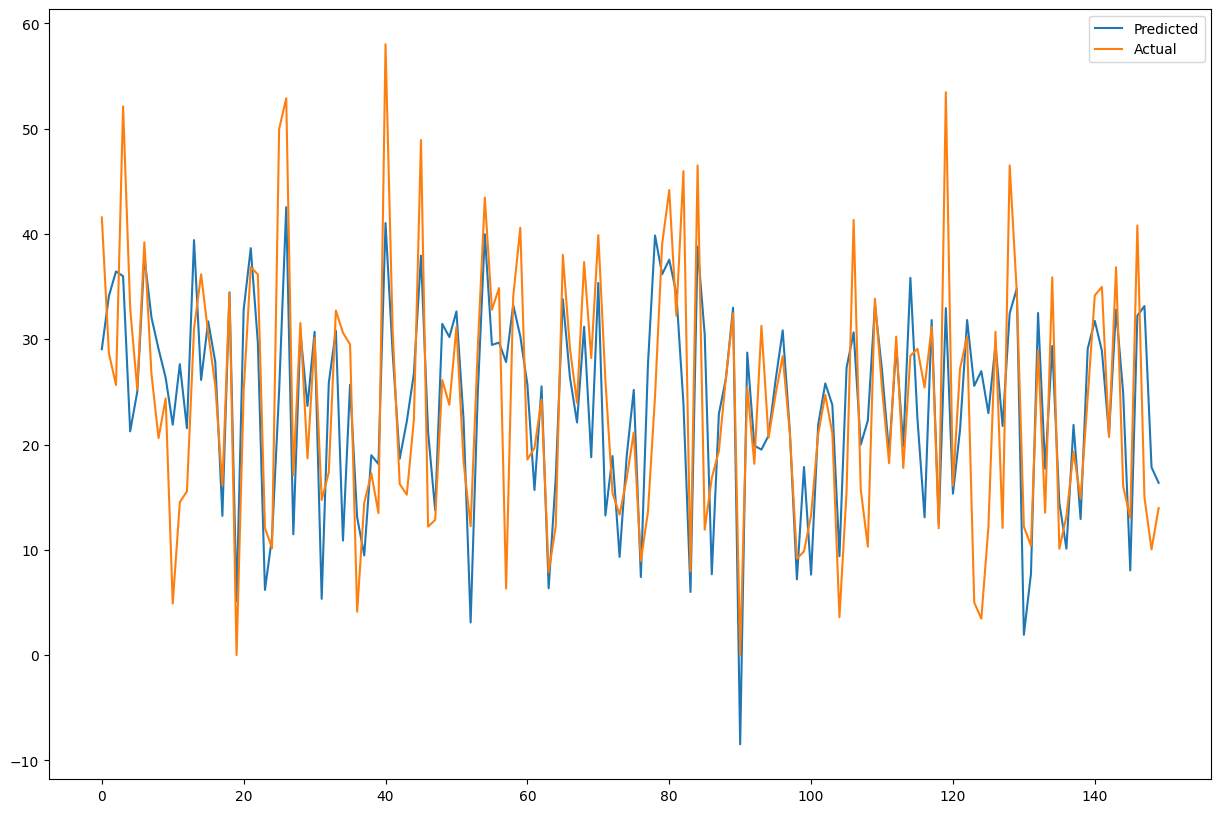

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-3,1e-2,1,5,10,20,50,55,60,100,0.1,0.2,0.3,0.4]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=3)
ridge_result=cal_eval_metrics(ridge_regressor,X_train,y_train,X_test,y_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 5}


# **ELASTICNET REGRESSOR**


------------------- Evaluation metrics --------------------

MSE: 181204.12021171607
r2_score: 0.5650887880127221
Adjusted R2: 0.5610780794295542



-----------------Graph of actual and predicted values----------------



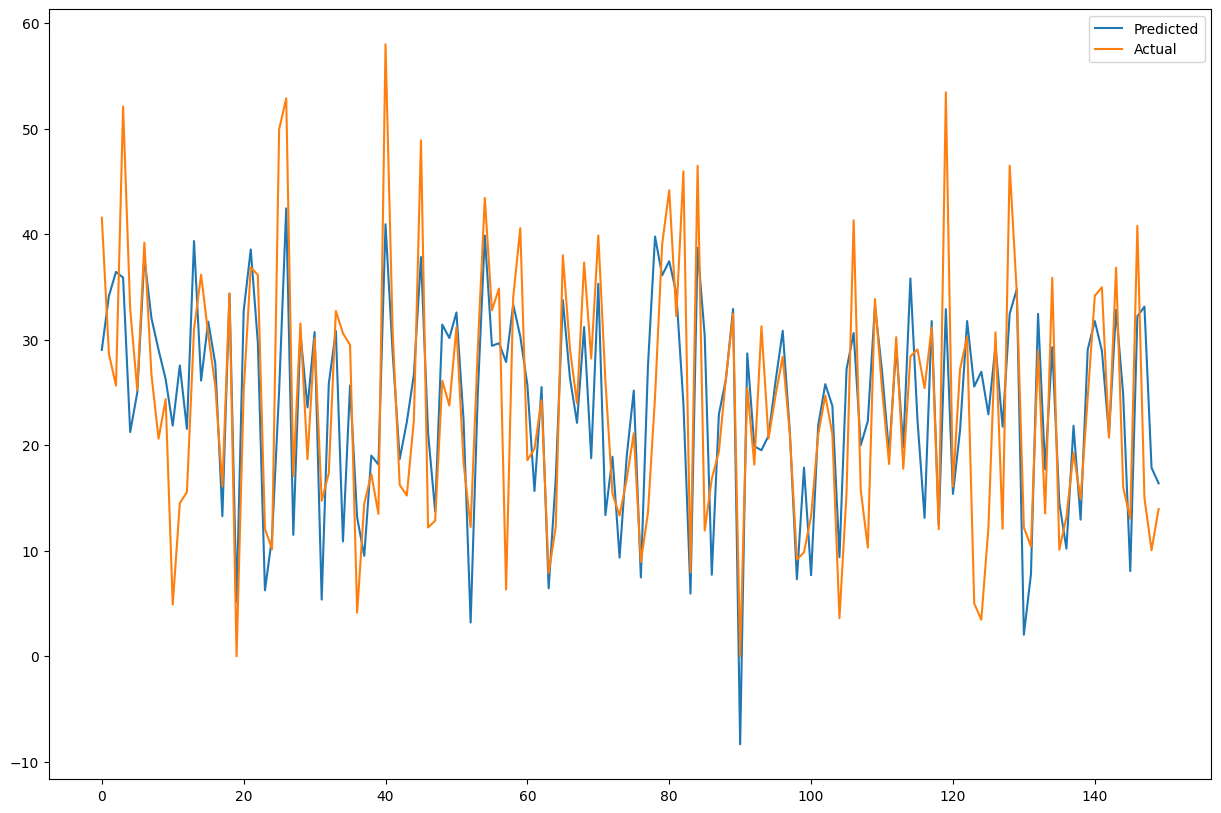

In [ ]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='r2',cv=5)
elastic_result=cal_eval_metrics(elastic_regressor,X_train,y_train,X_test,y_test)

In [ ]:
print("The best fit alpha, l1_ratio value is found out to be :" , elastic_regressor.best_params_)

The best fit alpha, l1_ratio value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.8}


# **POLYNOMIAL REGRESSION**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


------------------- Evaluation metrics --------------------

MSE: 131112.8153668685
r2_score: 0.6853138142132482
Adjusted R2: 0.6824118090417277



-----------------Graph of actual and predicted values----------------



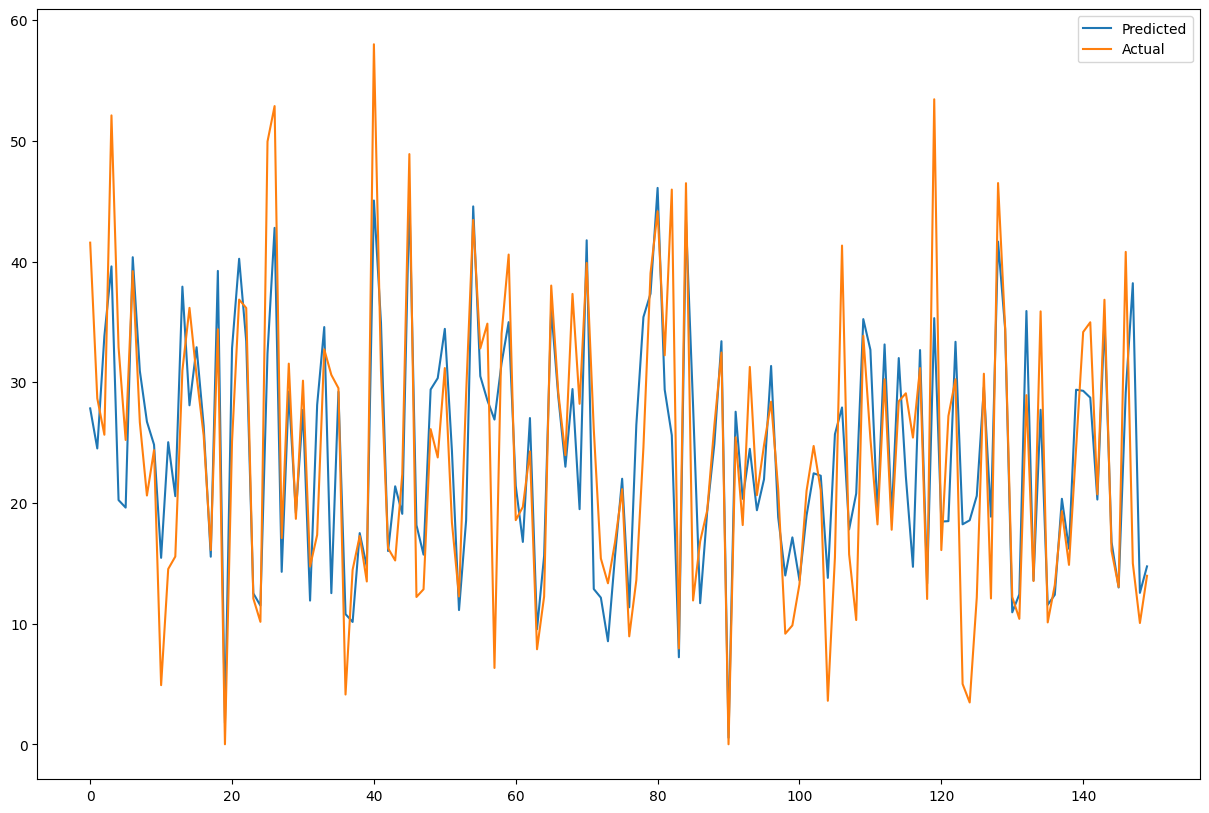

In [ ]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
pipe_result=cal_eval_metrics(pipe,X_train,y_train,X_test,y_test)

# **KNN REGRESSION**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


------------------- Evaluation metrics --------------------

MSE: 91022.02499112695
r2_score: 0.7815364288616888
Adjusted R2: 0.7795217792143039



-----------------Graph of actual and predicted values----------------



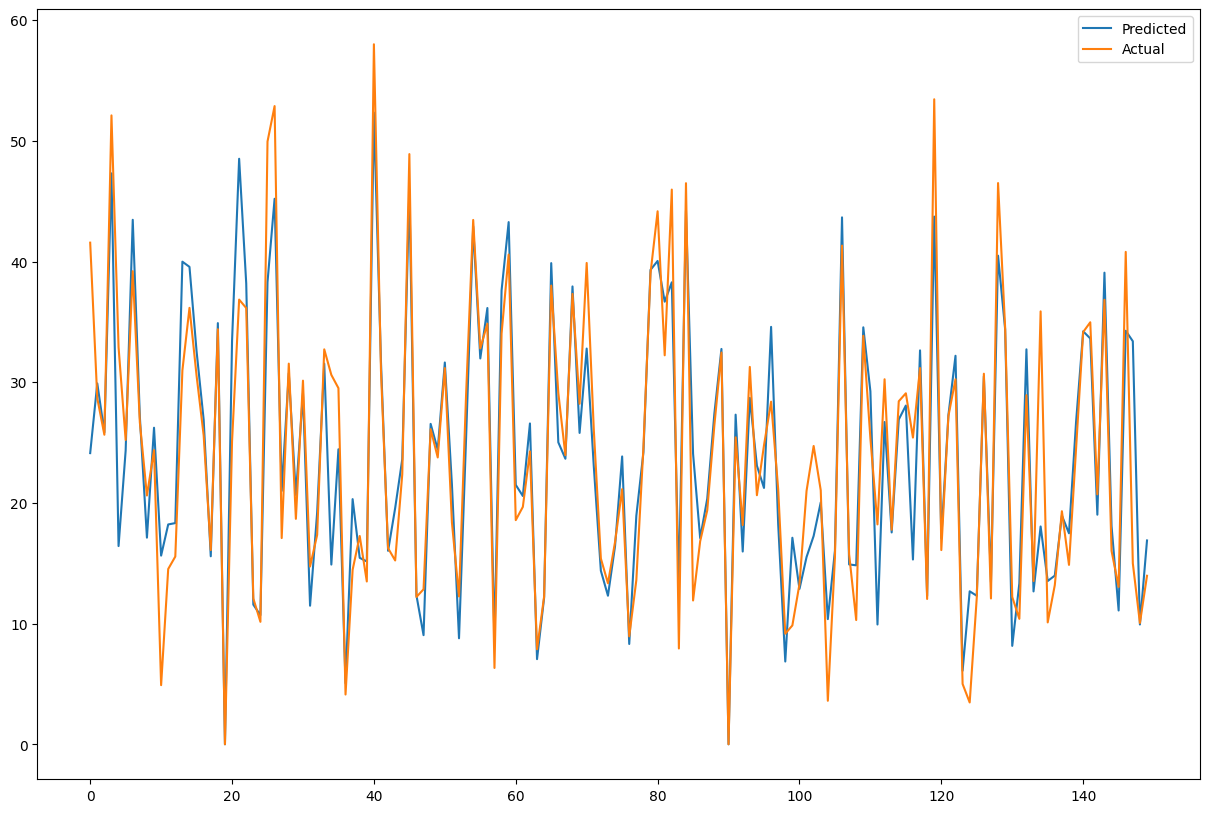

In [ ]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)
# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_= GridSearchCV(knn_model,param_grid=param_dict)
knn_result=cal_eval_metrics(knn_,X_train,y_train,X_test,y_test)

In [ ]:
print("The best fit value is found out to be :" , knn_.best_params_)

The best fit value is found out to be : {'n_neighbors': 3}


# **DECISION TREES**


------------------- Evaluation metrics --------------------

MSE: 79704.15753424658
r2_score: 0.8087006426060127
Adjusted R2: 0.8069364986761547



-----------------Graph of actual and predicted values----------------



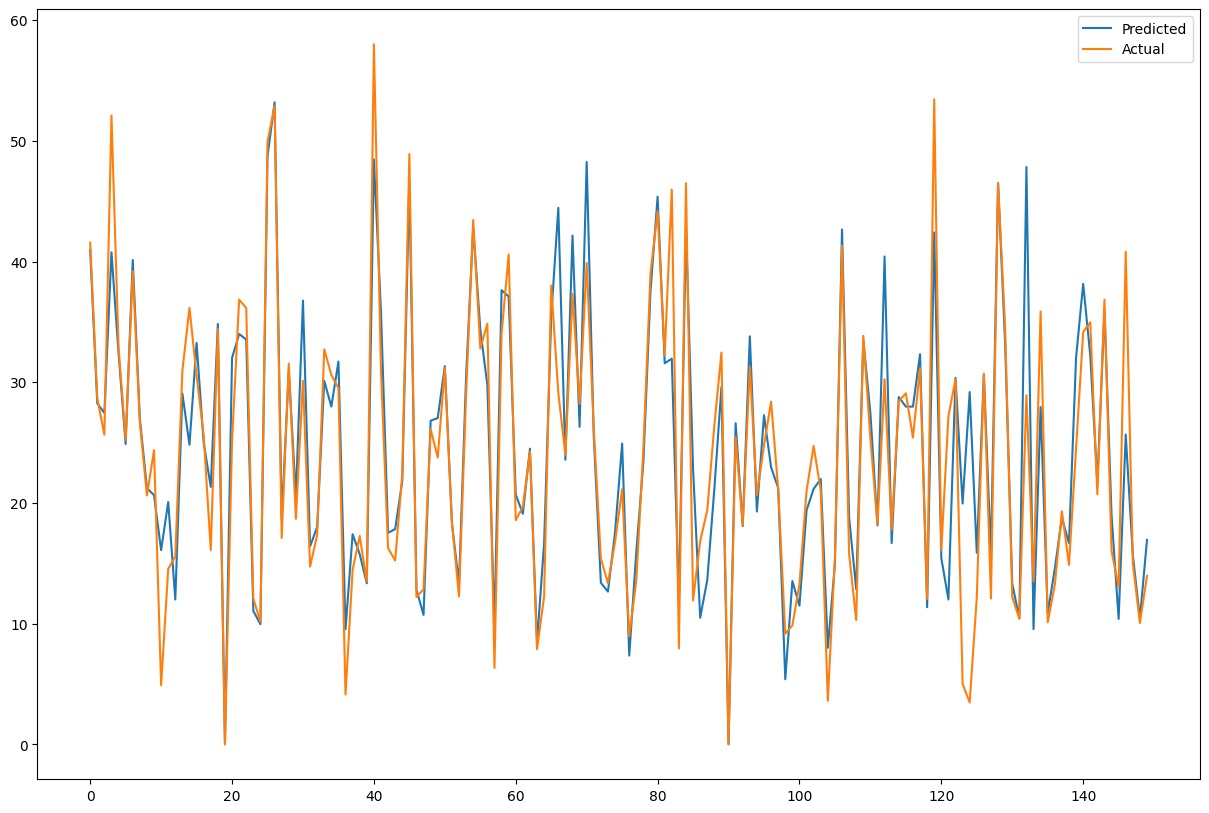

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_tree=DecisionTreeRegressor()
dec_tree_results=cal_eval_metrics(dec_tree,X_train,y_train,X_test,y_test)

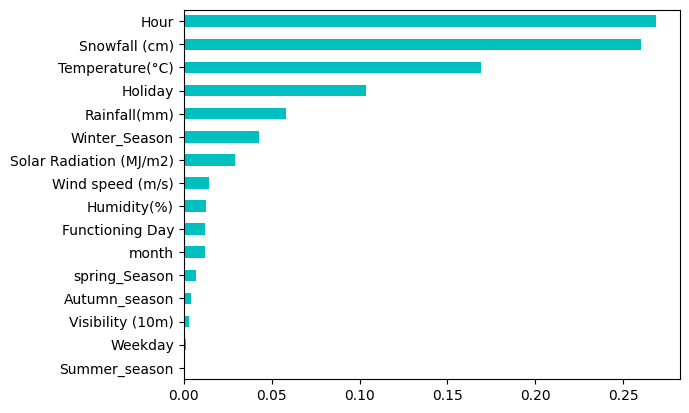

In [ ]:
features=pd.Series(dec_tree.feature_importances_,index= dataset[independent_variables].columns)
features.sort_values(inplace=True)
features.plot(kind="barh",color='c')
plt.show()

***Decision Tree using hyper parameter tuning***

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [3,9,15,20],
           "min_samples_leaf":[1,2,3,4,5,6,7,8],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

Streaming output truncated to the last 5000 lines.
[CV 1/3] END max_depth=9, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=-58.539 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=-61.079 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=-56.557 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=-41.336 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=-48.262 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=-36.665 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, splitter=random;, score=-60.122 total time=   0.0s
[CV 2/3] E

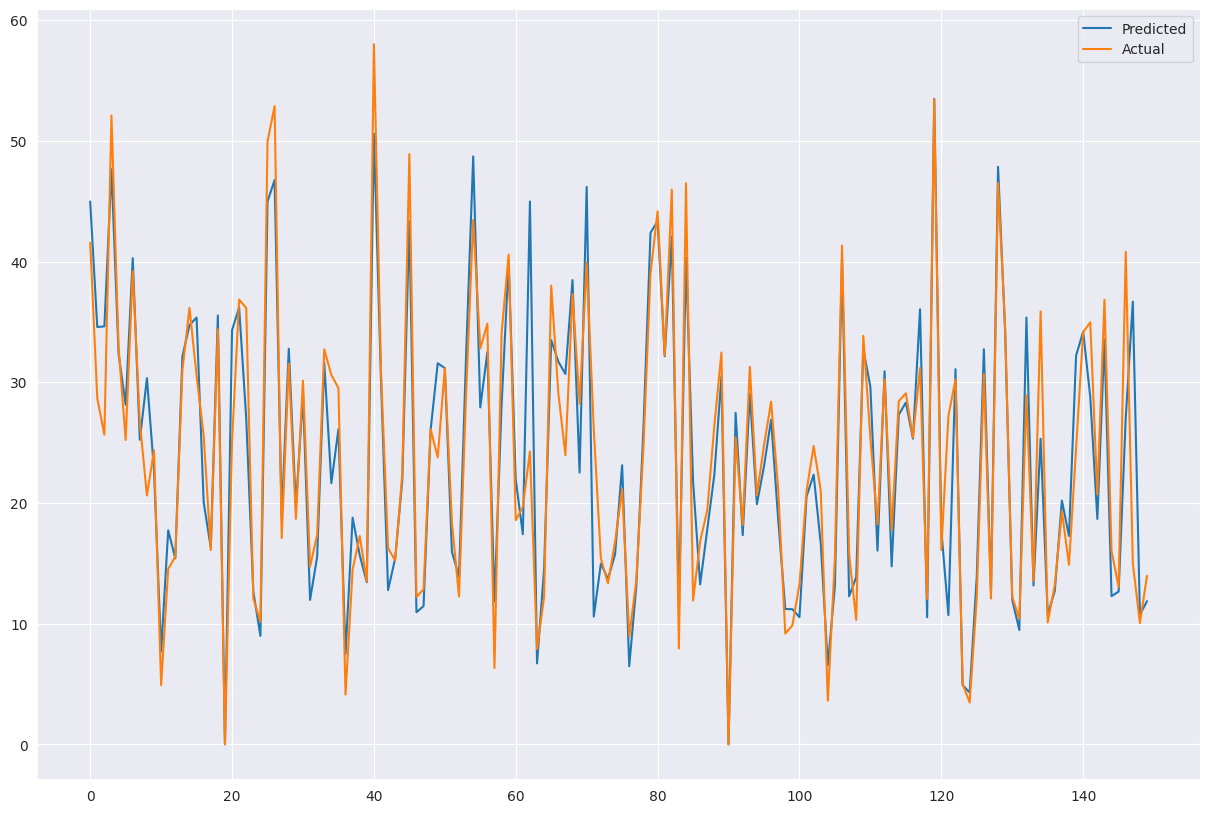

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_final=GridSearchCV(dec_tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
dec_tree_final_results=cal_eval_metrics(dec_tree_final,X_train,y_train,X_test,y_test)

After applying hyper parameter tuning, MSE value is reduced and r2_score value is improved.

In [ ]:
dec_tree_final.best_params_

{'max_depth': 20,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 7,
 'splitter': 'random'}

# **EXTRATREE REGRESSOR**


------------------- Evaluation metrics --------------------

MSE: 78037.1894977169
r2_score: 0.8127015620567632
Adjusted R2: 0.8109743142140591



-----------------Graph of actual and predicted values----------------



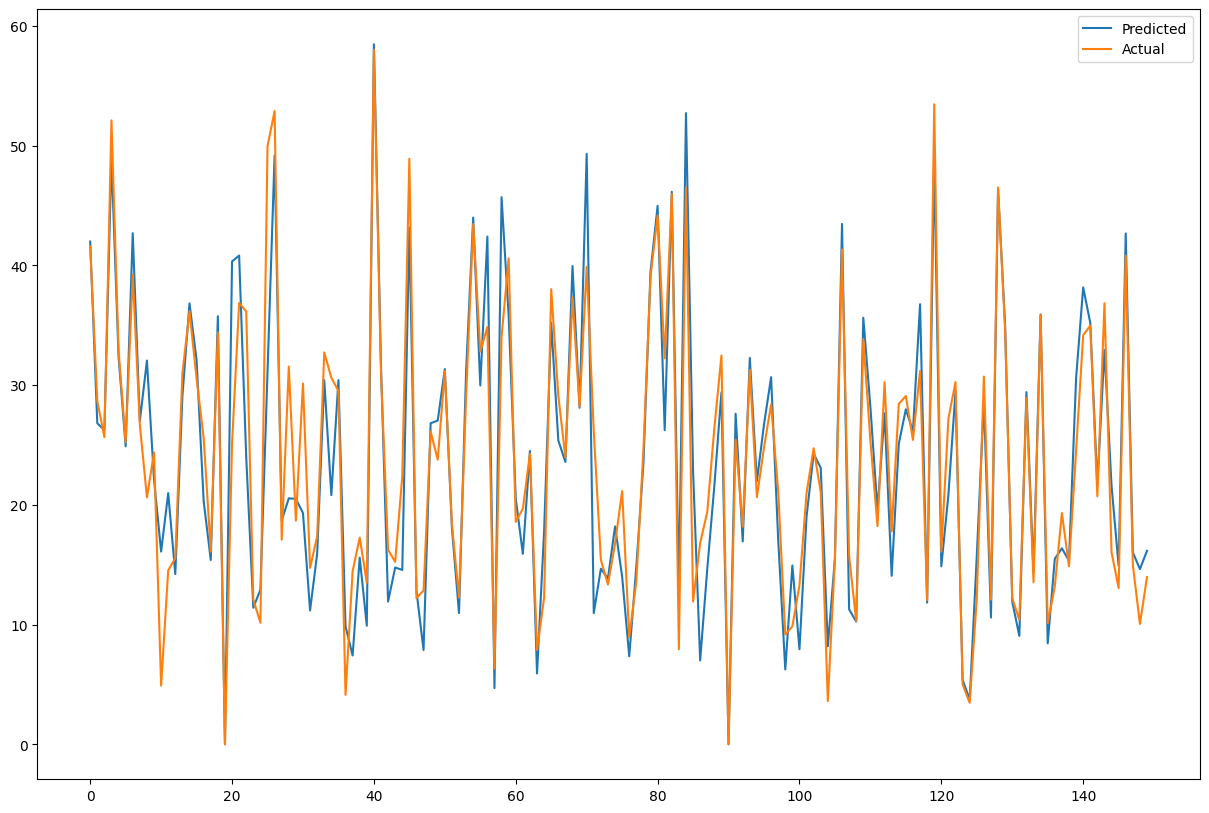

In [ ]:
from sklearn.tree import ExtraTreeRegressor
extra_tree=ExtraTreeRegressor()
extra_tree_results=cal_eval_metrics(extra_tree,X_train,y_train,X_test,y_test)

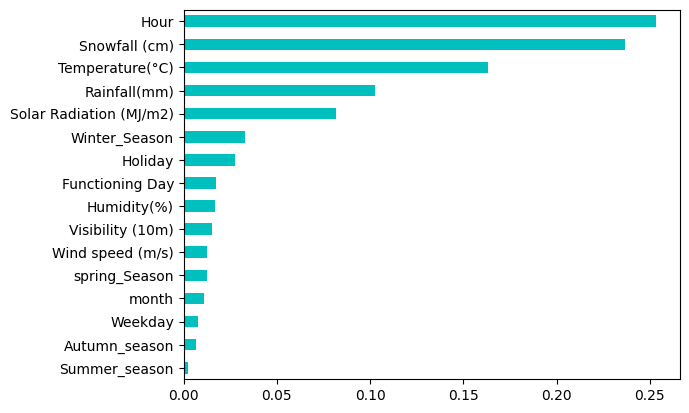

In [ ]:
features=pd.Series(extra_tree.feature_importances_,index= dataset[independent_variables].columns)
features.sort_values(inplace=True)
features.plot(kind="barh",color='c')
plt.show()

Streaming output truncated to the last 5000 lines.
[CV 1/3] END max_depth=9, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=-56.095 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=-61.142 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=log2, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=-59.256 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=-37.908 total time=   0.0s
[CV 2/3] END max_depth=9, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=-41.019 total time=   0.0s
[CV 3/3] END max_depth=9, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=-55.359 total time=   0.0s
[CV 1/3] END max_depth=9, max_features=log2, max_leaf_nodes=60, min_samples_leaf=2, splitter=random;, score=-59.598 total time=   0.0s
[CV 2/3] E

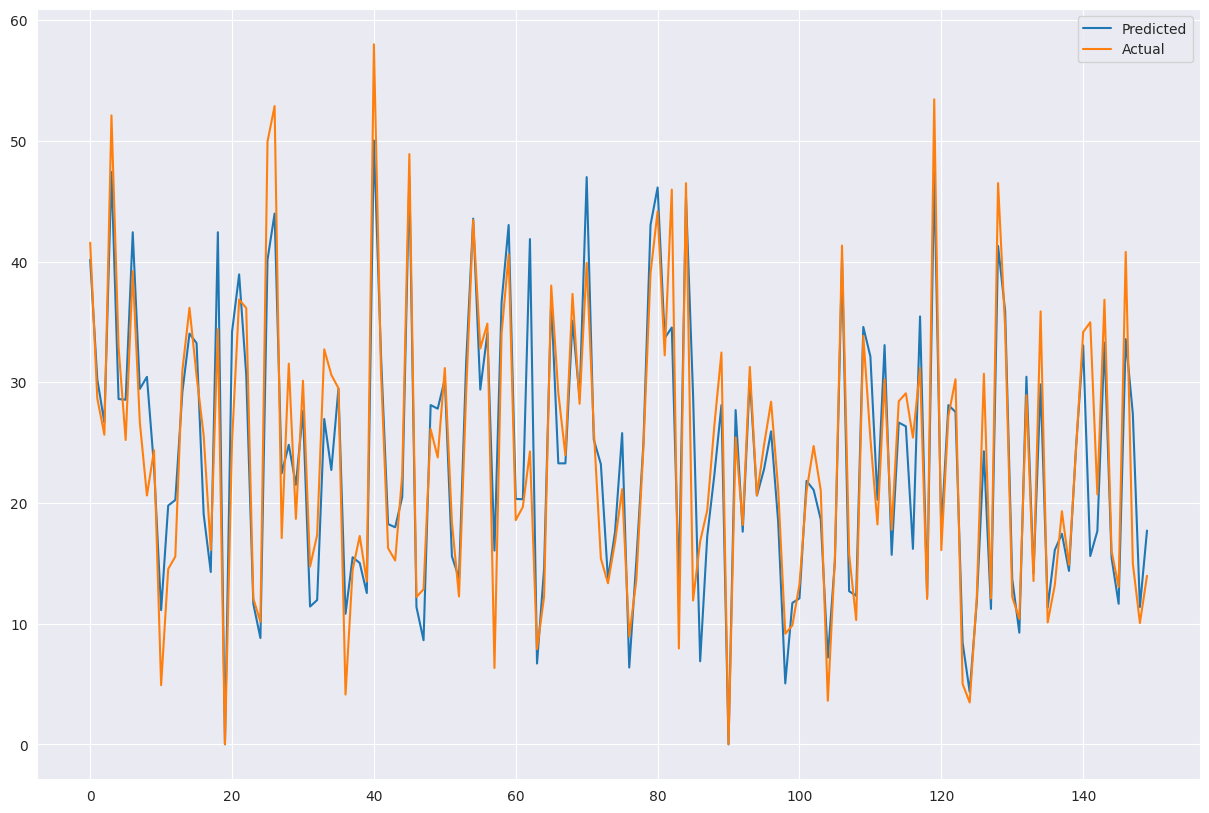

In [ ]:
extra_tree_final=GridSearchCV(extra_tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
extra_tree_final_results=cal_eval_metrics(extra_tree_final,X_train,y_train,X_test,y_test)

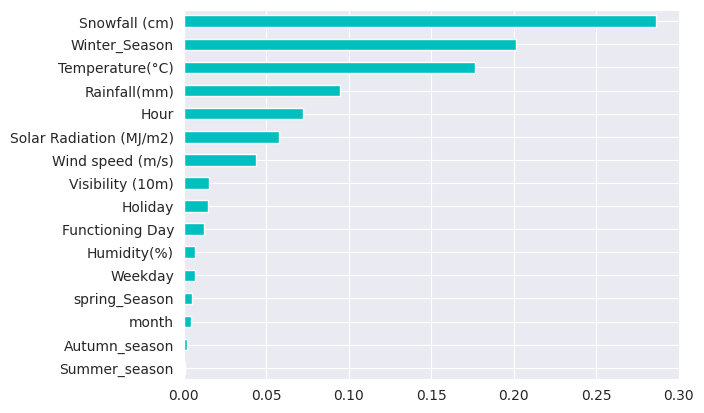

In [ ]:
features=pd.Series(extra_tree_final.best_estimator_.feature_importances_,index= dataset[independent_variables].columns)
features.sort_values(inplace=True)
features.plot(kind="barh",color='c')
plt.show()

In [ ]:
extra_tree_final.best_params_

{'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'splitter': 'random'}

# **RANDOM FOREST REGRESSOR**


------------------- Evaluation metrics --------------------

MSE: 43655.29571522271
r2_score: 0.8952221530780461
Adjusted R2: 0.8942559020401492



-----------------Graph of actual and predicted values----------------



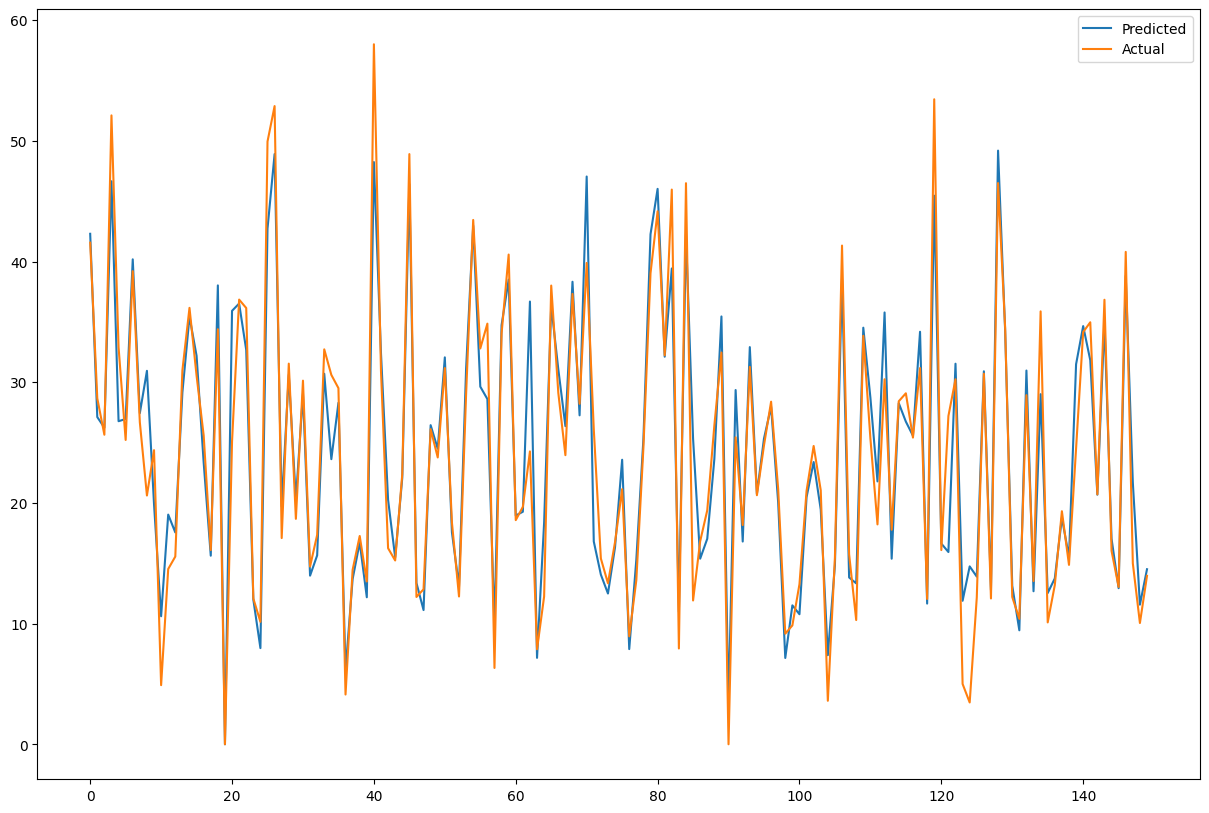

In [ ]:
# RandomForest
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.model_selection import GridSearchCV
random_forest=RF()
random_forest_results=cal_eval_metrics(random_forest,X_train,y_train,X_test,y_test)


Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV 1/3] END max_depth=5, n_estimators=100, random_state=1;, score=-30.719 total time=   0.9s
[CV 2/3] END max_depth=5, n_estimators=100, random_state=1;, score=-27.792 total time=   0.8s
[CV 3/3] END max_depth=5, n_estimators=100, random_state=1;, score=-28.829 total time=   0.9s
[CV 1/3] END max_depth=5, n_estimators=100, random_state=2;, score=-30.920 total time=   0.8s
[CV 2/3] END max_depth=5, n_estimators=100, random_state=2;, score=-27.564 total time=   1.1s
[CV 3/3] END max_depth=5, n_estimators=100, random_state=2;, score=-29.138 total time=   1.2s
[CV 1/3] END max_depth=5, n_estimators=100, random_state=42;, score=-30.372 total time=   1.1s
[CV 2/3] END max_depth=5, n_estimators=100, random_state=42;, score=-28.115 total time=   0.8s
[CV 3/3] END max_depth=5, n_estimators=100, random_state=42;, score=-29.040 total time=   0.8s
[CV 1/3] END max_depth=5, n_estimators=150, random_state=1;, score=-30.624 total time=   

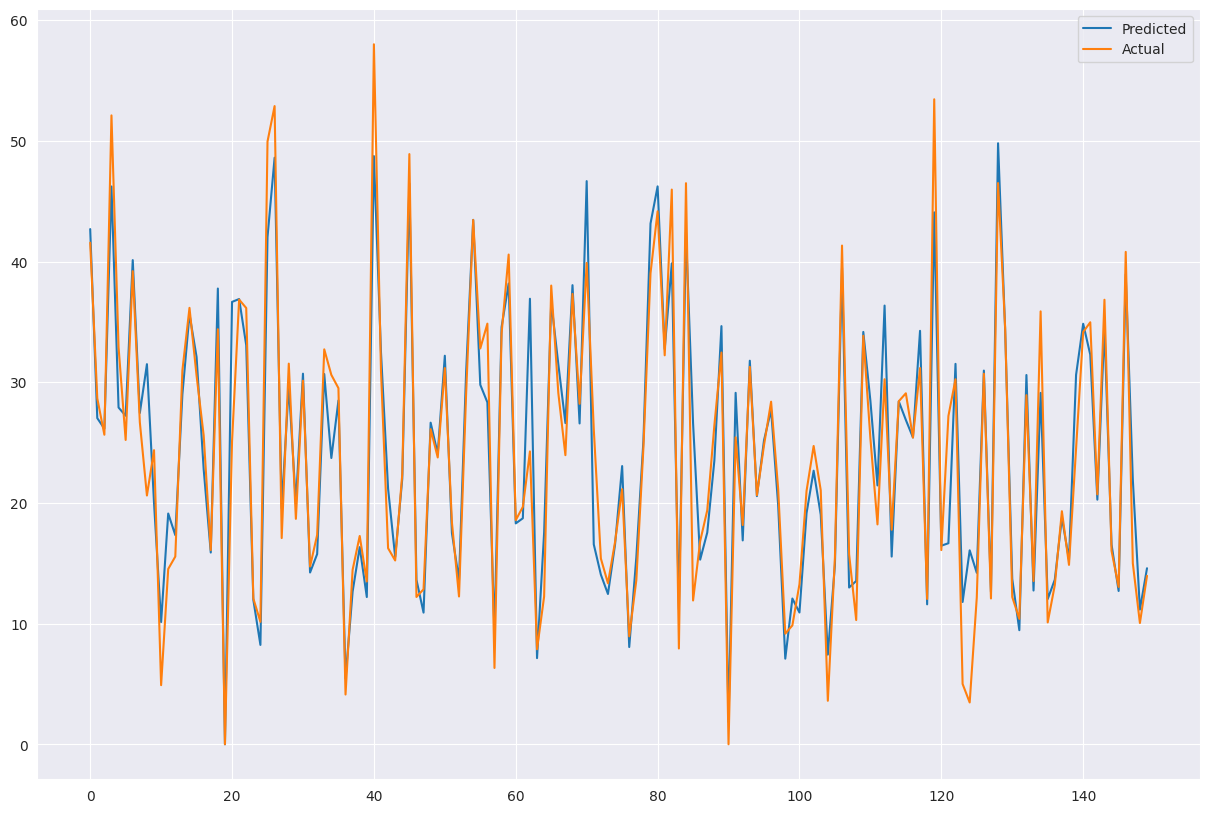

In [ ]:
parameters={'n_estimators':[100,150,200,250,300],'max_depth':[5,10,15,20,30],'random_state':[1,2,42]}
RF_final=GridSearchCV(random_forest,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
RF_final_results=cal_eval_metrics(RF_final,X_train,y_train,X_test,y_test)

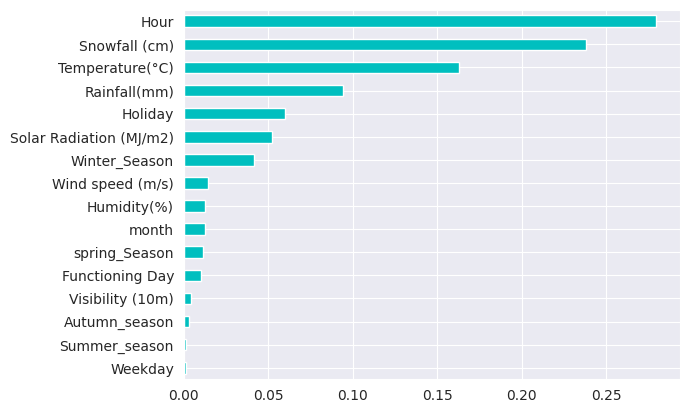

In [ ]:
features=pd.Series(RF_final.best_estimator_.feature_importances_,index= dataset[independent_variables].columns)
features.sort_values(inplace=True)
features.plot(kind="barh",color='c')
plt.show()

In [ ]:
RF_final.best_params_

{'max_depth': 30, 'n_estimators': 300, 'random_state': 1}

# **BOOSTING TECHNIQUES**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor,StackingRegressor,VotingRegressor
from xgboost import XGBRegressor

# **GRADIENT BOOSTING**


------------------- Evaluation metrics --------------------

MSE: 69160.90666886503
r2_score: 0.8340056853765166
Adjusted R2: 0.8324749020716316



-----------------Graph of actual and predicted values----------------



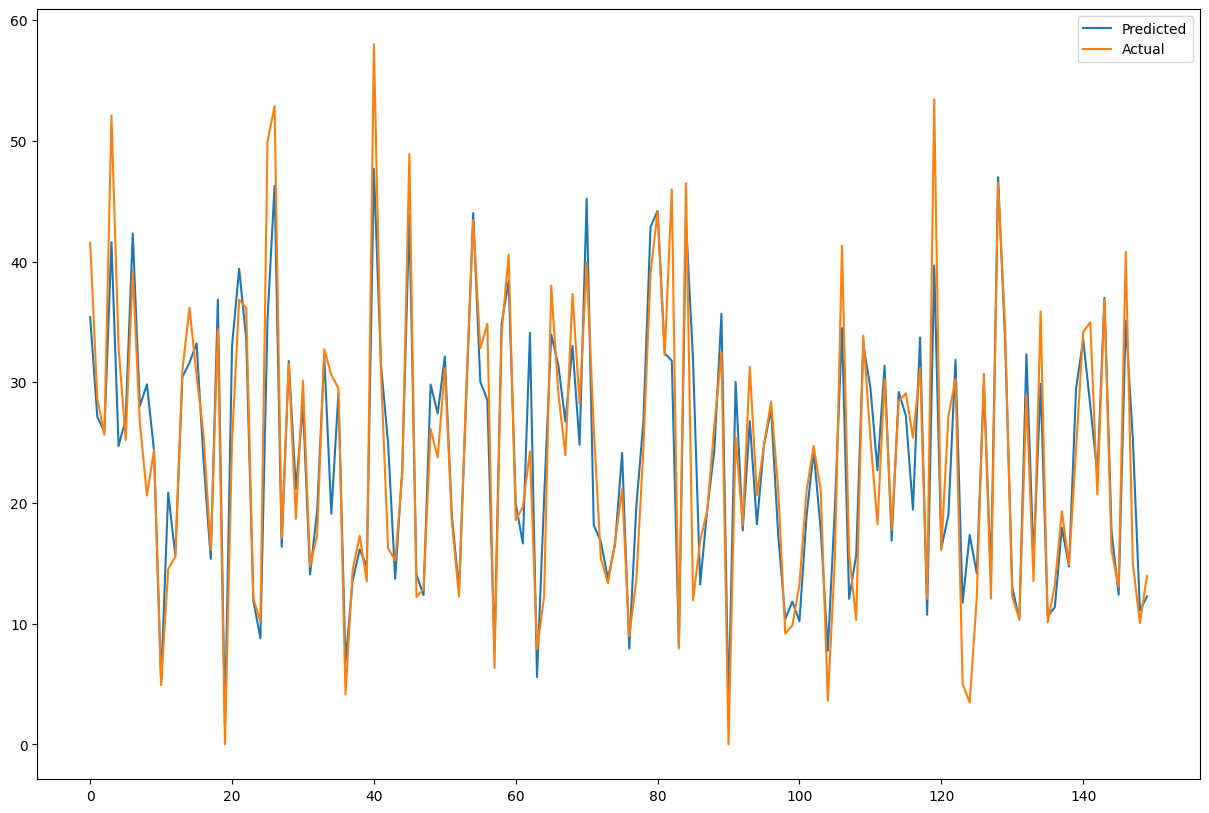

In [ ]:
GB=GradientBoostingRegressor()
GB_results=cal_eval_metrics(GB,X_train,y_train,X_test,y_test)


------------------- Evaluation metrics --------------------

MSE: 38851.391515844625
r2_score: 0.9067520884635175
Adjusted R2: 0.905892165360011



-----------------Graph of actual and predicted values----------------



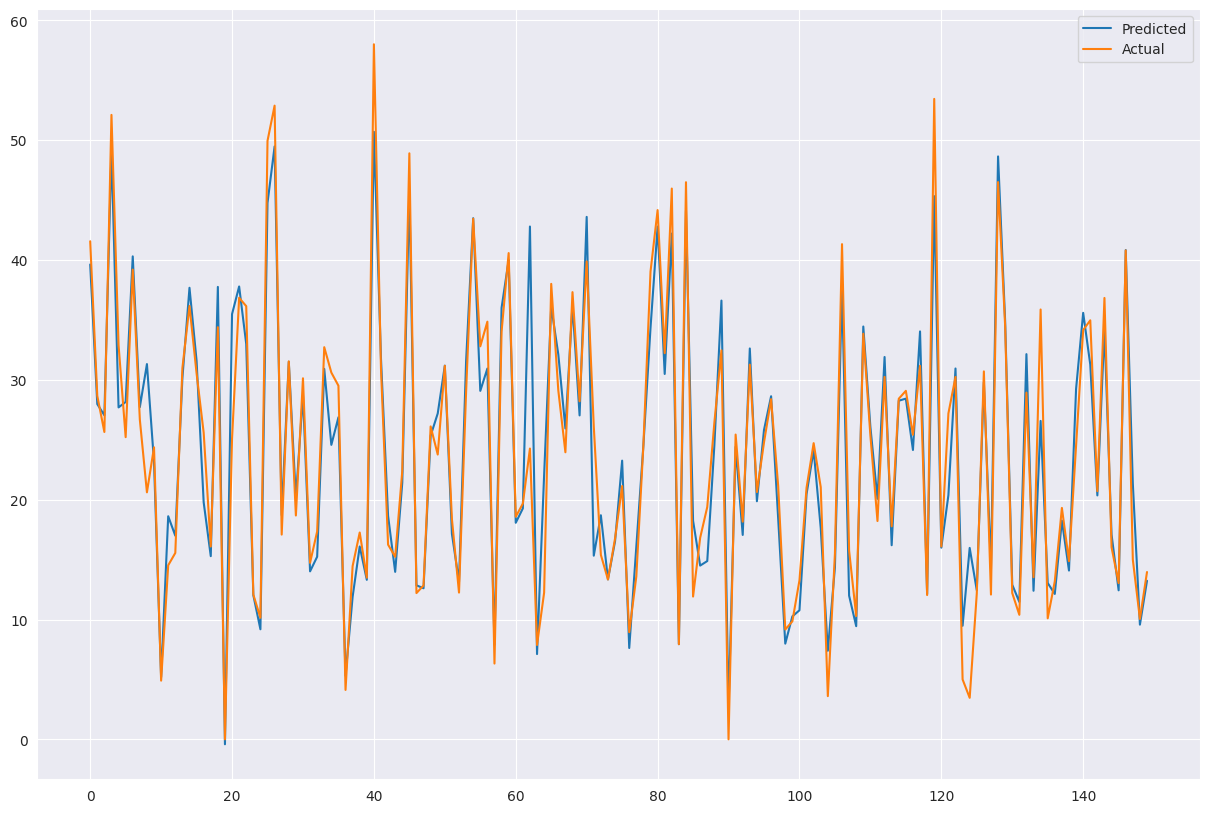

In [ ]:
param_grid={'n_estimators':[100,150,200],'learning_rate':[0.01,.1,.3],'max_depth':[2,4,5,6],'subsample':[.5,.75],'random_state':[1,42]}
GB_final=GridSearchCV(GB,param_grid,cv=3)
GB_final_results=cal_eval_metrics(GB_final,X_train,y_train,X_test,y_test)

In [ ]:
features=pd.Series(GB_final.best_estimator_.feature_importances_,index= dataset[independent_variables].columns)
features.sort_values(inplace=True)
features.plot(kind="barh",color='c')
plt.show()

In [ ]:
GB_final.best_params_

## **XGB**


------------------- Evaluation metrics --------------------

MSE: 39687.34461952458
r2_score: 0.9047457026425926
Adjusted R2: 0.9038672768456366



-----------------Graph of actual and predicted values----------------



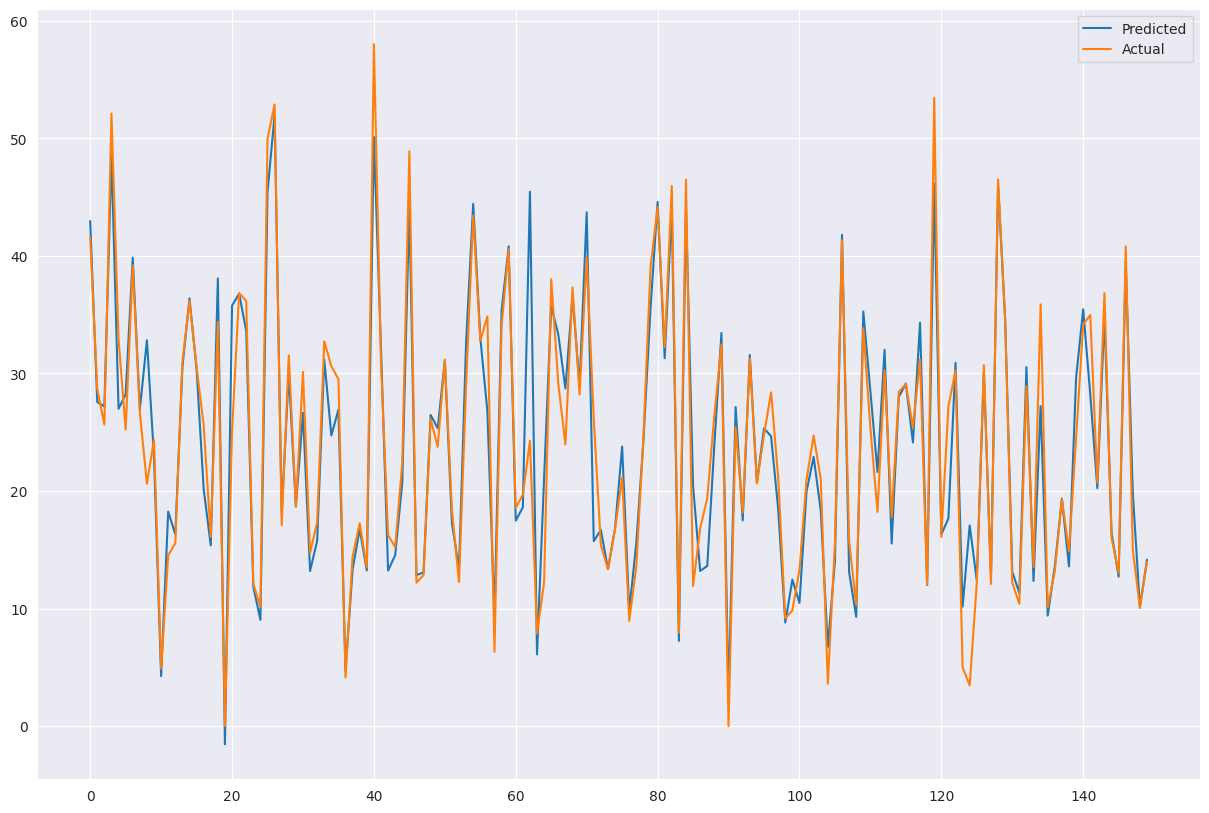

In [ ]:
XGB=XGBRegressor()
XGB_results=cal_eval_metrics(XGB,X_train,y_train,X_test,y_test)


------------------- Evaluation metrics --------------------

MSE: 39052.35520814279
r2_score: 0.9062697519532842
Adjusted R2: 0.905405380789741



-----------------Graph of actual and predicted values----------------



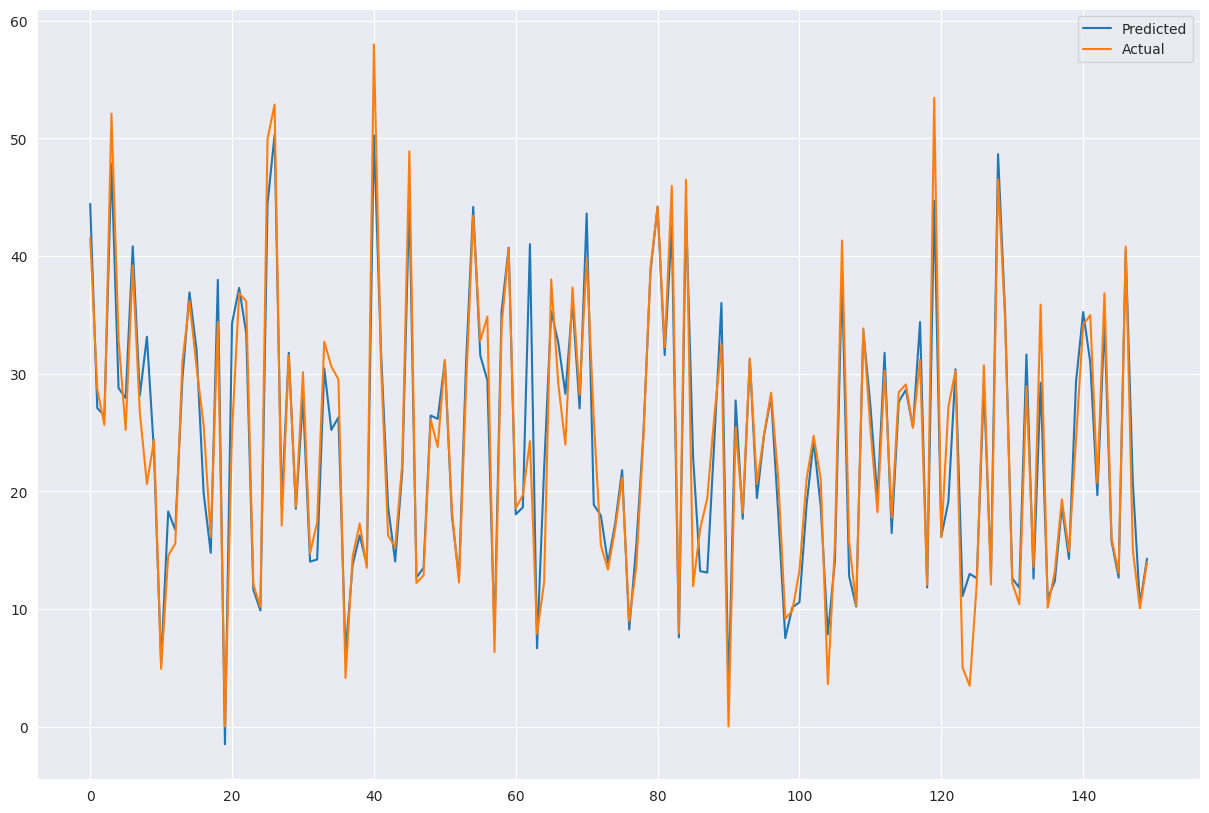

In [ ]:
XGB=XGBRegressor()
param_grid={
            'n_estimators':[100,150,200],'learning_rate':[0.01,.1,.3],'max_depth':[2,4,5,6],'subsample':[.5,.75],'random_state':[42]
}
XGB_FINAL=GridSearchCV(XGB,param_grid,cv=3)
XGB_final_results=cal_eval_metrics(XGB_FINAL,X_train,y_train,X_test,y_test)

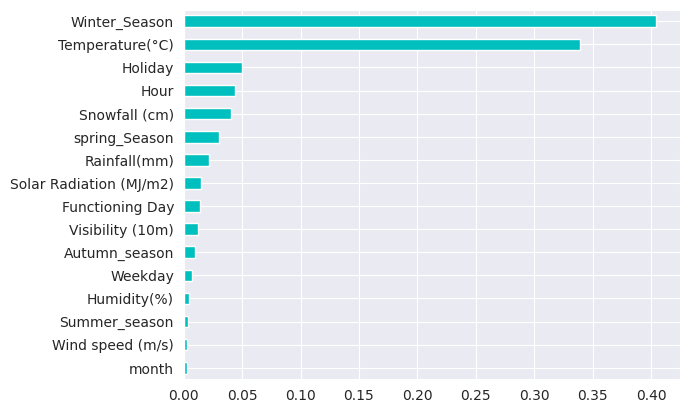

In [ ]:
features=pd.Series(XGB_FINAL.best_estimator_.feature_importances_,index= dataset[independent_variables].columns)
features.sort_values(inplace=True)
features.plot(kind="barh",color='c')
plt.show()

In [ ]:
XGB_FINAL.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 200,
 'random_state': 42,
 'subsample': 0.75}

# **VOTING REGRESSOR**


------------------- Evaluation metrics --------------------

MSE: 39150.93276827223
r2_score: 0.9060331542087044
Adjusted R2: 0.9051666011639432



-----------------Graph of actual and predicted values----------------



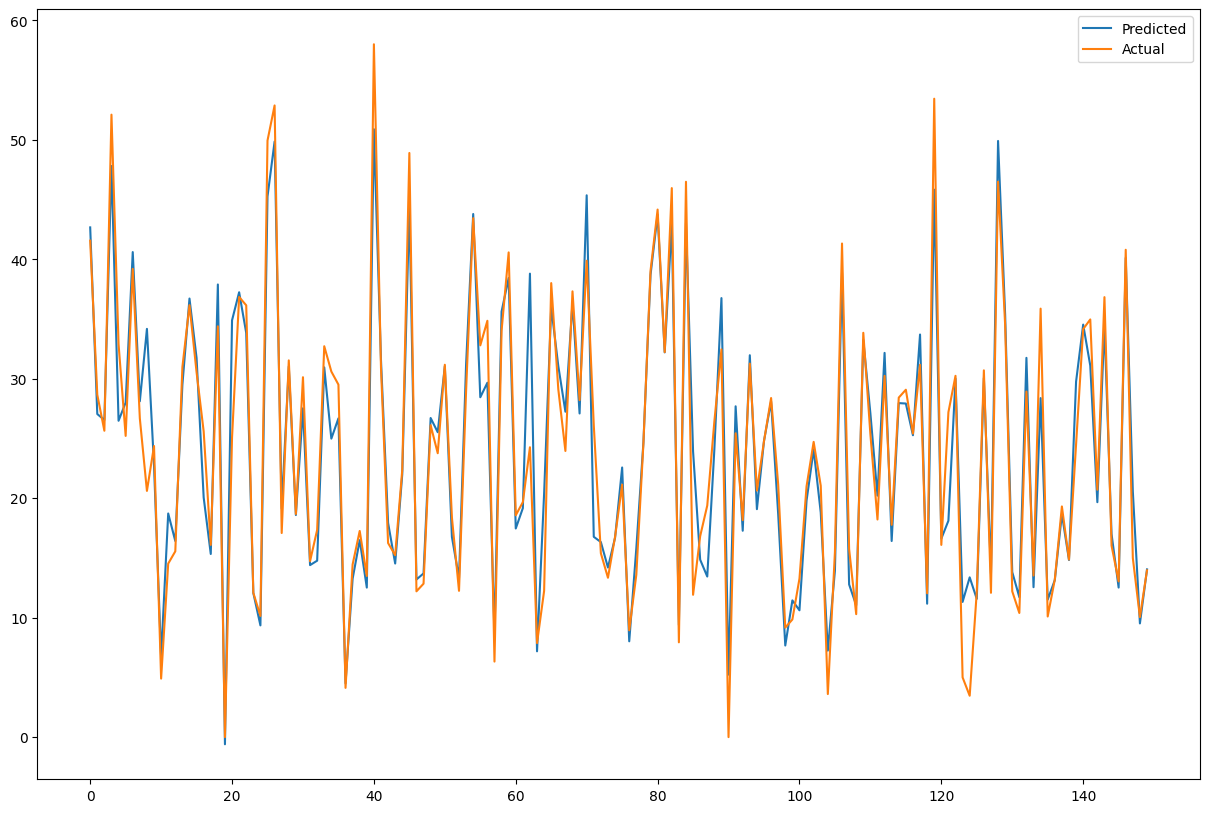

In [ ]:
rf = RF()
gbdt = GradientBoostingRegressor(learning_rate= 0.1,max_depth=6,n_estimators=200,random_state=42,subsample=0.75)
xgb = XGBRegressor(learning_rate=0.1,max_depth=6,n_estimators=200,random_state=42,subsample=0.75)
VR = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb)],weights=[1,5,1])
VR_results=cal_eval_metrics(VR,X_train,y_train,X_test,y_test)

# **STACKING THREE REGRESSORS**


------------------- Evaluation metrics --------------------

MSE: 38376.576519935625
r2_score: 0.9078917003282988
Adjusted R2: 0.9070422866137471



-----------------Graph of actual and predicted values----------------



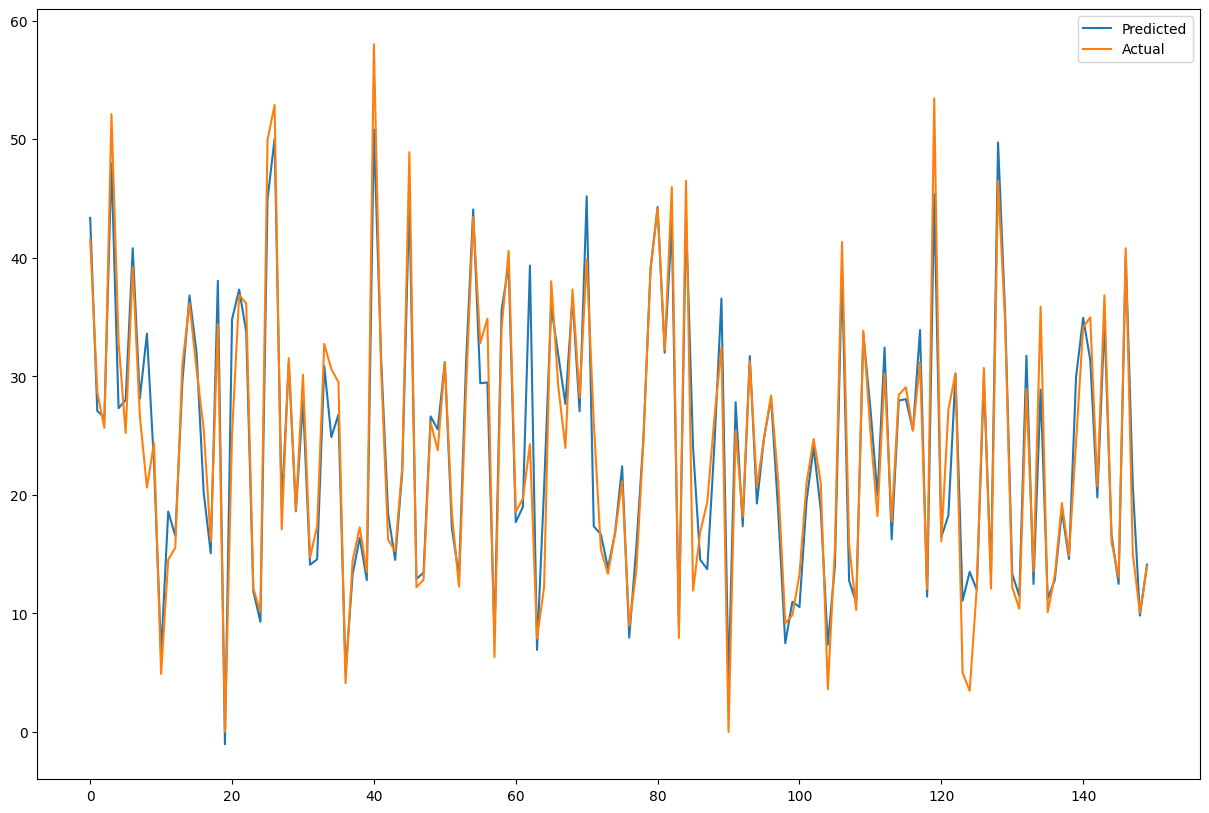

In [ ]:
estimators = [
    ('rf', RF()),
    ('gbdt',GradientBoostingRegressor(learning_rate= 0.1,max_depth=6,n_estimators=200,random_state=42,subsample=0.75)),
    ('xgb', XGBRegressor(learning_rate= 0.1,max_depth=6,n_estimators=200,random_state=42,subsample=0.75))
]

SR = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=5))
SR_results=cal_eval_metrics(SR,X_train,y_train,X_test,y_test)

# **CATBOOST REGRESSOR**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00



------------------- Evaluation metrics --------------------

MSE: 36189.48718485251
r2_score: 0.9131409721016673
Adjusted R2: 0.9123399666570717



-----------------Graph of actual and predicted values----------------



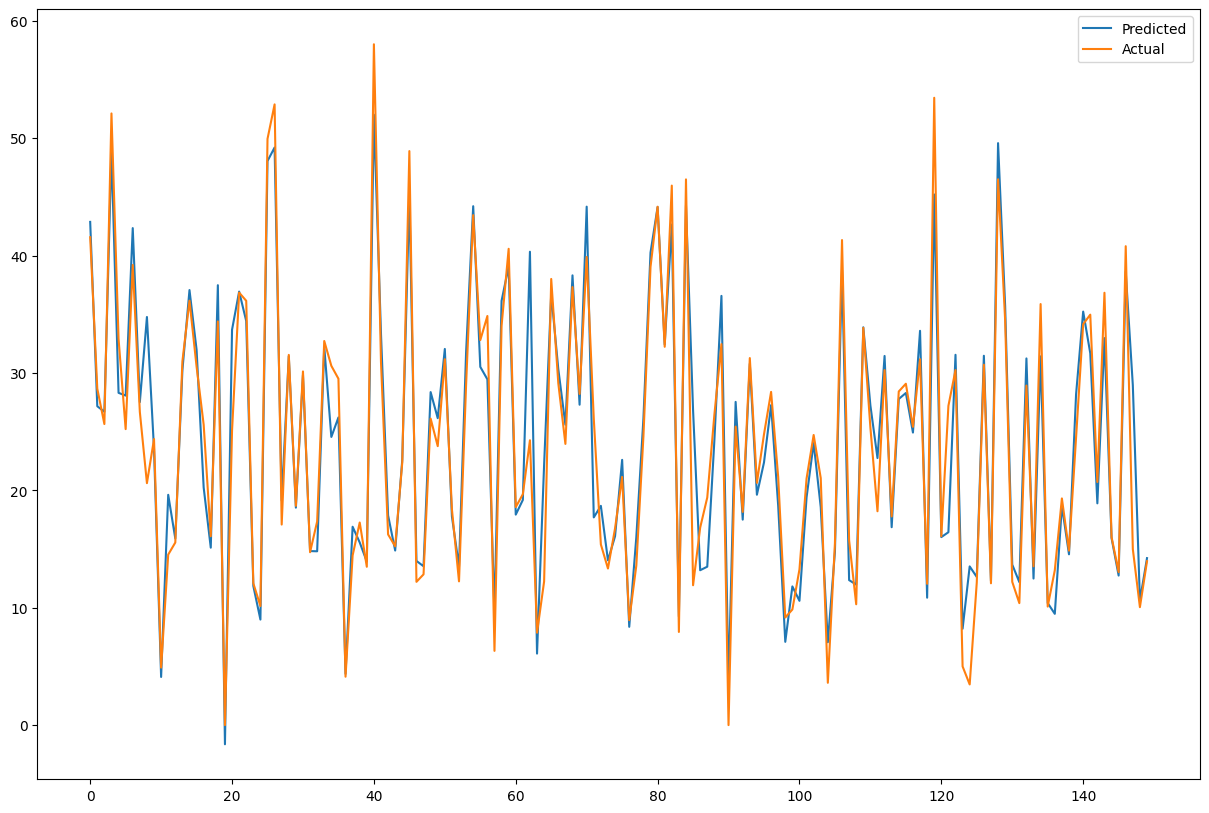

In [ ]:
import catboost as cb
CB=cb.CatBoostRegressor(verbose=0)
CB_results=cal_eval_metrics(CB,X_train,y_train,X_test,y_test)

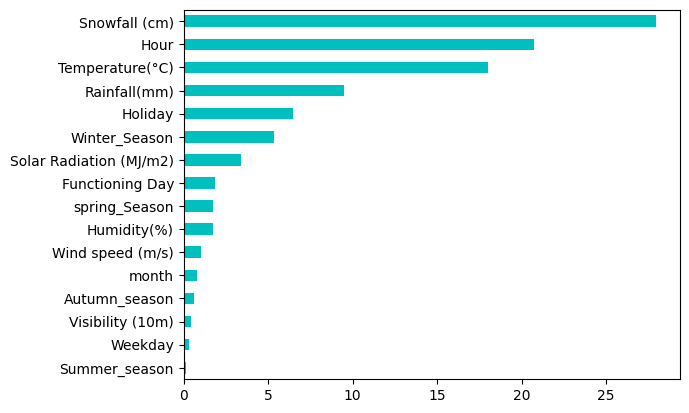

In [ ]:
features=pd.Series(CB.feature_importances_,index= dataset[independent_variables].columns)
features.sort_values(inplace=True)
features.plot(kind="barh",color='c')
plt.show()

# **MODEL EXPLAINIBILITY**

**SHAP:**

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 3.2 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import export_graphviz
import shap
import graphviz
sns.set_style('darkgrid')

In [ ]:
#shape for catboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(XGB)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(X_test)
# # visualize the first prediction's explanation with a force plot
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test_shap.iloc[0,:])

**ELI5:**

In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=b22429fab72a6da2a21da043d1aa31090509744688951de35b65226068e1ec33
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5 as eli

In [ ]:
feature_names=list(X_test_shap.columns)

In [ ]:
eli.explain_weights(XGB_FINAL.best_estimator_,feature_names=feature_names)

Explanation(estimator='XGBRegressor(base_score=None, booster=None, callbacks=None,\n             colsample_bylevel=None, colsample_bynode=None,\n             colsample_bytree=None, early_stopping_rounds=None,\n             enable_categorical=False, eval_metric=None, feature_types=None,\n             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,\n             interaction_constraints=None, learning_rate=0.1, max_bin=None,\n             max_cat_threshold=None, max_cat_to_onehot=None,\n             max_delta_step=None, max_depth=6, max_leaves=None,\n             min_child_weight=None, missing=nan, monotone_constraints=None,\n             n_estimators=200, n_jobs=None, num_parallel_tree=None,\n             predictor=None, random_state=42, ...)', description='\nXGBoost feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='feature importances', is_regression=True, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Winter_Season', weight=0.40428808, std=None, value=None), FeatureWeight(feature='Functioning Day', weight=0.33932015, std=None, value=None), FeatureWeight(feature='Rainfall(mm)', weight=0.04994928, std=None, value=None), FeatureWeight(feature='Temperature(°C)', weight=0.043511324, std=None, value=None), FeatureWeight(feature='Hour', weight=0.040775567, std=None, value=None), FeatureWeight(feature='Autumn_season', weight=0.03033418, std=None, value=None), FeatureWeight(feature='Humidity(%)', weight=0.021845037, std=None, value=None), FeatureWeight(feature='Solar Radiation (MJ/m2)', weight=0.014857308, std=None, value=None), FeatureWeight(feature='Weekday', weight=0.0136836, std=None, value=None), FeatureWeight(feature='spring_Season', weight=0.011885703, std=None, value=None), FeatureWeight(feature='Holiday', weight=0.009452616, std=None, value=None), FeatureWeight(feature='Summer_season', weight=0.0069232364, std=None, value=None), FeatureWeight(feature='month', weight=0.0041094325, std=None, value=None), FeatureWeight(feature='Snowfall (cm)', weight=0.0036339264, std=None, value=None), FeatureWeight(feature='Visibility (10m)', weight=0.0029280237, std=None, value=None), FeatureWeight(feature='Wind speed (m/s)', weight=0.0025024654, std=None, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
eli.explain_weights(CB,feature_names=list(X_train_shap.columns))

Explanation(estimator='<catboost.core.CatBoostRegressor object at 0x7931f5e1bc70>', description='CatBoost feature importances; \nvalues are numbers 0 <= x <= 1; all values sum to 1.', error=None, method='feature importances', is_regression=True, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Hour', weight=0.2795224, std=None, value=None), FeatureWeight(feature='Temperature(°C)', weight=0.20699522, std=None, value=None), FeatureWeight(feature='Functioning Day', weight=0.1803362, std=None, value=None), FeatureWeight(feature='Humidity(%)', weight=0.09470217, std=None, value=None), FeatureWeight(feature='Rainfall(mm)', weight=0.064469144, std=None, value=None), FeatureWeight(feature='Winter_Season', weight=0.053189214, std=None, value=None), FeatureWeight(feature='Solar Radiation (MJ/m2)', weight=0.03400509, std=None, value=None), FeatureWeight(feature='Weekday', weight=0.018393718, std=None, value=None), FeatureWeight(feature='Autumn_season', weight=0.017500192, std=None, value=None), FeatureWeight(feature='month', weight=0.017136613, std=None, value=None), FeatureWeight(feature='Visibility (10m)', weight=0.010382789, std=None, value=None), FeatureWeight(feature='Wind speed (m/s)', weight=0.008150471, std=None, value=None), FeatureWeight(feature='Holiday', weight=0.0063205175, std=None, value=None), FeatureWeight(feature='spring_Season', weight=0.0044284207, std=None, value=None), FeatureWeight(feature='Summer_season', weight=0.003225434, std=None, value=None), FeatureWeight(feature='Snowfall (cm)', weight=0.0012423832, std=None, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [ ]:
eli.show_prediction(XGB, X_test[0],
                    feature_names=feature_names,
                    show_feature_values=True)

In [ ]:
eli.show_prediction(XGB_FINAL.best_estimator_, X_test[0],
                    feature_names=feature_names,
                    show_feature_values=True)

## ***Future Work (Optional)***

The project can be further modelled using other latest regression algorithms like LightBGM etc.

# **Comparision of all Regression Models**

In [ ]:
models=["Linear_Regressor","Lasso_Regressor","Ridge_Regressor","Elasticnet_Regressor","Polynomial_Regressor","KNN","Decision_Tree","Tuned_DC","Extratree_Regressor","Tuned_Extratree_Regressor","RF","Tuned_RF","GB","Tuned_GB","XGB","Tuned_XGB","Voting_Regressor","Stacking_Regressor","CatBoostRegressor"]

In [ ]:
final_results=pd.concat([LR_result,lasso_result,ridge_result,elastic_result,pipe_result,knn_result,dec_tree_results,dec_tree_final_results,extra_tree_results,extra_tree_final_results,random_forest_results,RF_final_results,GB_results,GB_final_results,XGB_results,XGB_final_results,VR_results,SR_results,CB_results],axis=1)

In [ ]:
final_results.columns=models

In [ ]:
final_results

Linear_Regressor  Lasso_Regressor  Ridge_Regressor  \
MSE             180651.338318    181107.652460    180892.387006   
MAE                283.351659       283.388308       283.305413   
RMSE               425.030985       425.567448       425.314457   
R2                   0.566416         0.565320         0.565837   
Adjusted R2          0.562417         0.561312         0.561833   

             Elasticnet_Regressor  Polynomial_Regressor           KNN  \
MSE                 181204.120212         131112.815367  91022.024991   
MAE                    283.436498            229.633365    181.611399   
RMSE                   425.680773            362.095036    301.698566   
R2                       0.565089              0.685314      0.781536   
Adjusted R2              0.561078              0.682412      0.779522   

             Decision_Tree      Tuned_DC  Extratree_Regressor  \
MSE           79704.157534  72520.539919         78037.189498   
MAE             157.788813    162.514412           157.344749   
RMSE            282.319248    269.296379           279.351373   
R2                0.808701      0.825942             0.812702   
Adjusted R2       0.806936      0.824337             0.810974   

             Tuned_Extratree_Regressor            RF      Tuned_RF  \
MSE                       69306.019228  43655.295715  43649.631513   
MAE                         161.136583    120.385486    120.232579   
RMSE                        263.260364    208.938497    208.924942   
R2                            0.833657      0.895222      0.895236   
Adjusted R2                   0.832123      0.894256      0.894270   

                       GB      Tuned_GB           XGB     Tuned_XGB  \
MSE          69160.906669  38851.391516  39687.344620  39052.355208   
MAE            160.391387    112.651277    113.300564    112.416174   
RMSE           262.984613    197.107563    199.216828    197.616688   
R2               0.834006      0.906752      0.904746      0.906270   
Adjusted R2      0.832475      0.905892      0.903867      0.905405   

             Voting_Regressor  Stacking_Regressor  CatBoostRegressor  
MSE              39150.932768        38376.576520       36189.487185  
MAE                112.773664          111.443232         112.311025  
RMSE               197.865946          195.899404         190.235347  
R2                   0.906033            0.907892           0.913141  
Adjusted R2          0.905167            0.907042           0.912340

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

It is important to make the rental bike avaliable and accessible to public at the right time with less waiting time. Various factors like temperature, visibility, snowfall, rainfall etc, effects the rental bikes availability. In this project, different regression techniques are applied on the bike sharing dataset and results are compared. Hyper parameter tuning and cross validation is applied on base regressors and found that improvemnt in the scores.From the feature importance it is evident that, the factors like Hour, temperature, season, functioning day mainly effect the bookings of rented bikes. More bikes are rented around 6pm in the evening. In winter season there are less number of rides. The rides are more in summer. In weekdays, the rented bike count will be high compared to weekoffs and holidays. The bookings are less in January,Febuary,December as it comes under winter season. Keeping all these point into consideration, the stable supply of bikes can be maintained by increasing the bikes at required area and hour and less bikes in normal timings. The particular climatic inputs are provided to the model and bike count is predicted. By this way, the revenue of the rented bike company is also increased as it is adaptable with the time. Out of all the algorithms, CatBoost Regressor provided least error and the best r2 value.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***